In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

# Data Loading and Understanding


In [3]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
print(df.shape)
df.head()

(5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [5]:
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [6]:
# Checking for duplicates in CustomerID column:
df['CustomerID'].duplicated().any()


False

In [7]:
#drop the customer ID
df = df.drop('CustomerID', axis=1)


In [8]:
df.nunique()


,0
Churn,2
Tenure,36
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,34
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6
PreferedOrderCat,6


In [9]:
df.select_dtypes(exclude=np.number).columns


Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [10]:
df.describe(include='O')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [11]:
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("*****************************")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
*****************************
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
*****************************
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
*****************************
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
*****************************


In [12]:
df.select_dtypes(include=np.number).columns


Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [13]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("*****************************")

Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
*****************************
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: count, dtype: int64
*****************************
CityTier : [3 1 2]
CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64
*****************************
WarehouseToHome : [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.

In [14]:
#giving same common name to different keywords that represent same thing
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,3996
Computer,1634


In [15]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Mobile Phone,2080
Laptop & Accessory,2050
Fashion,826
Grocery,410
Others,264


In [16]:
df['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
Cash on Delivery,514
UPI,414


In [17]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

,0
Churn,object
Tenure,float64
PreferredLoginDevice,object
CityTier,object
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,object
PreferedOrderCat,object


In [18]:
# Describing the Categorical columns after Converting
df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )


,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,2,2,3,5,2,6,5,5,3,15,2
top,0,Mobile Phone,1,Debit Card,Male,4,Mobile Phone,3,Married,2,0
freq,4682,3996,3666,2314,3384,2377,2080,1698,2986,1369,4026


In [19]:
# Numerical cols after Converting
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


# Exploratory Data Analysis

In [20]:
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

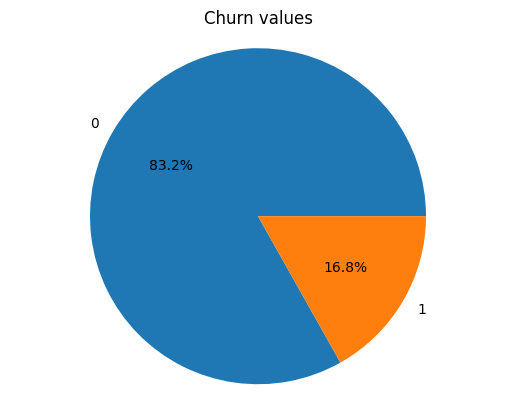

In [21]:
def plot_pie_chart(df, column_name):
    column_counts = df['Churn'].value_counts()
    plt.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')
    plt.title(f'Churn values')
    plt.axis('equal')

    plt.show()

plot_pie_chart(df, 'Churn')

<Axes: xlabel='Churn', ylabel='count'>

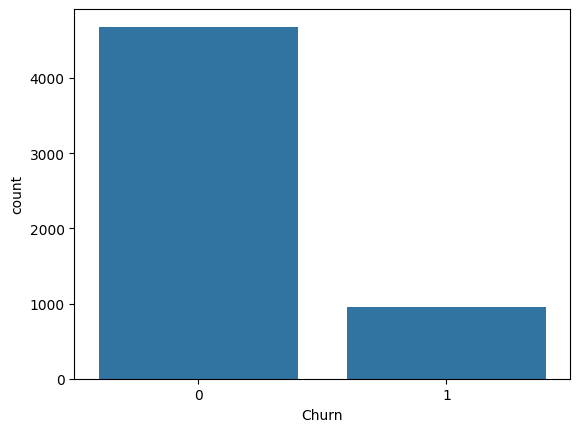

In [22]:
import seaborn as sns
sns.countplot(x='Churn', data=df)

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']


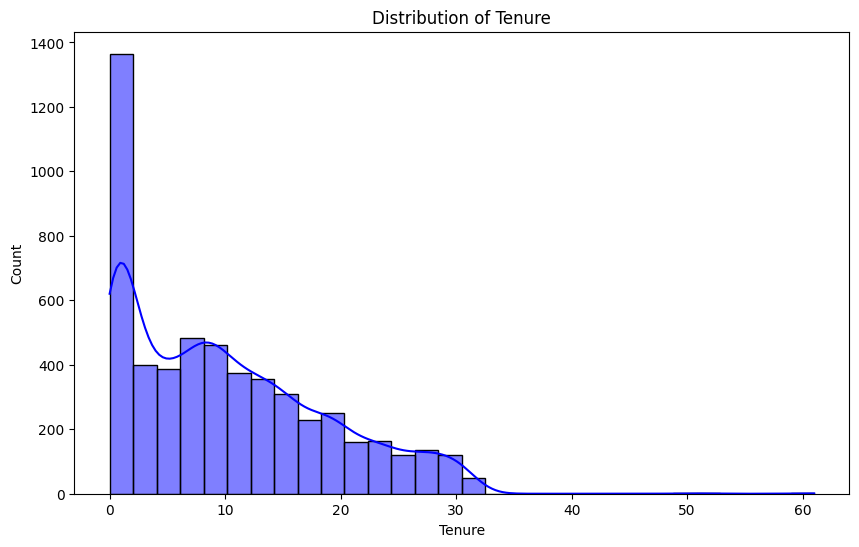

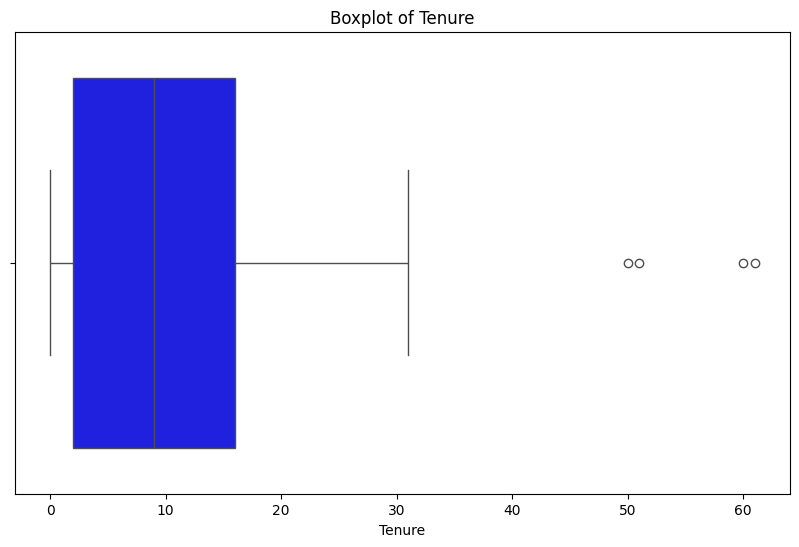

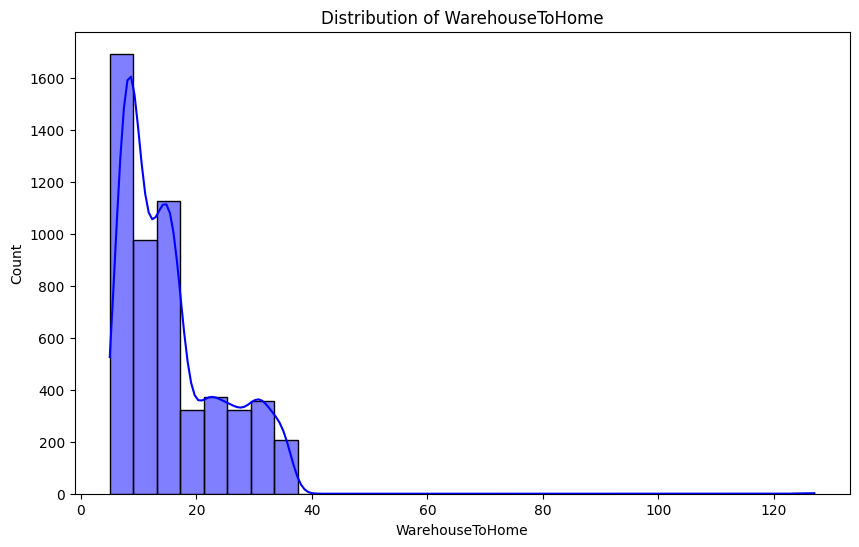

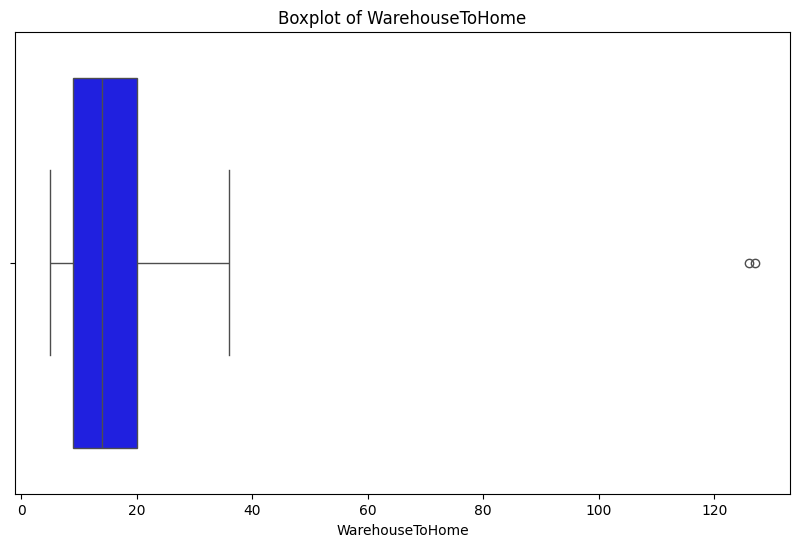

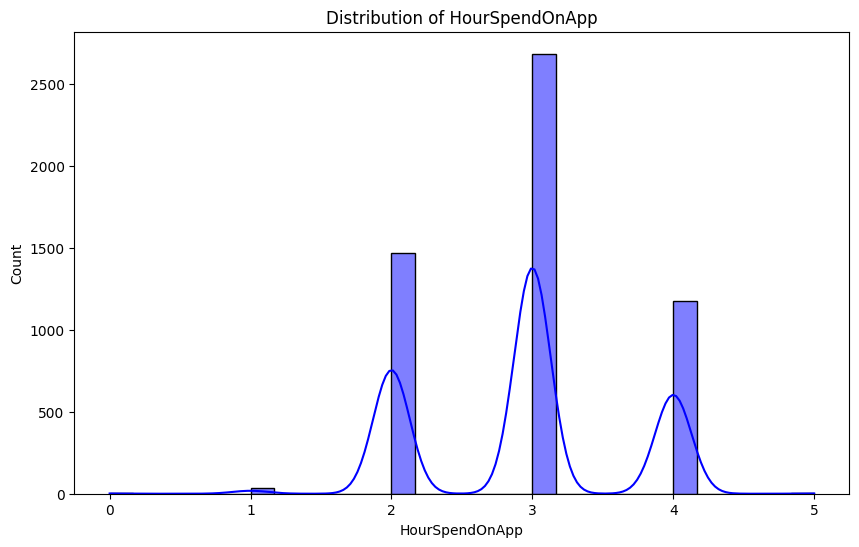

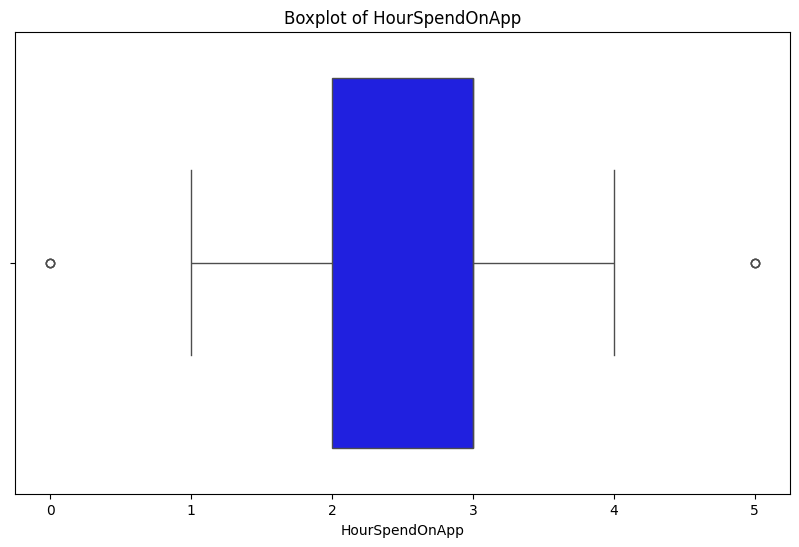

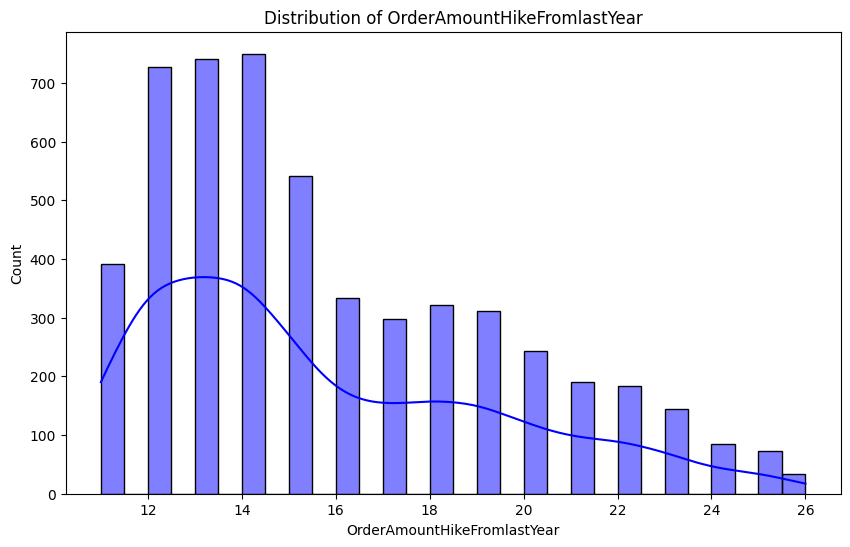

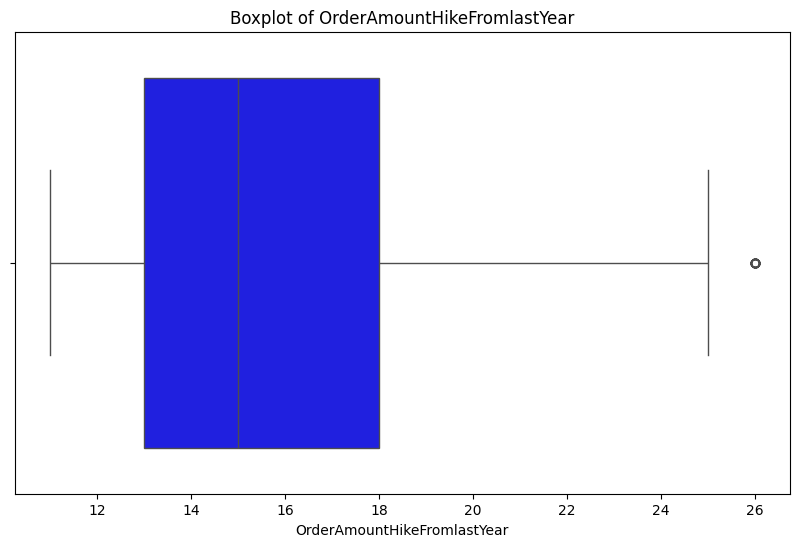

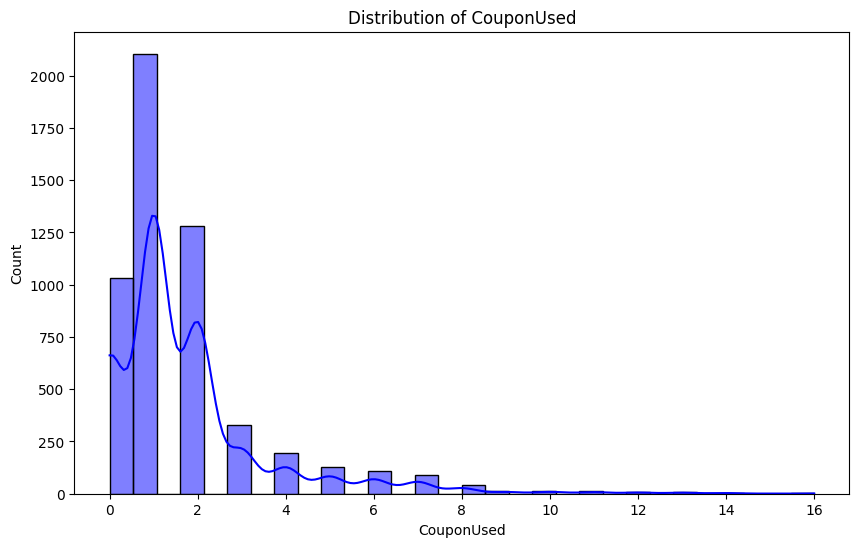

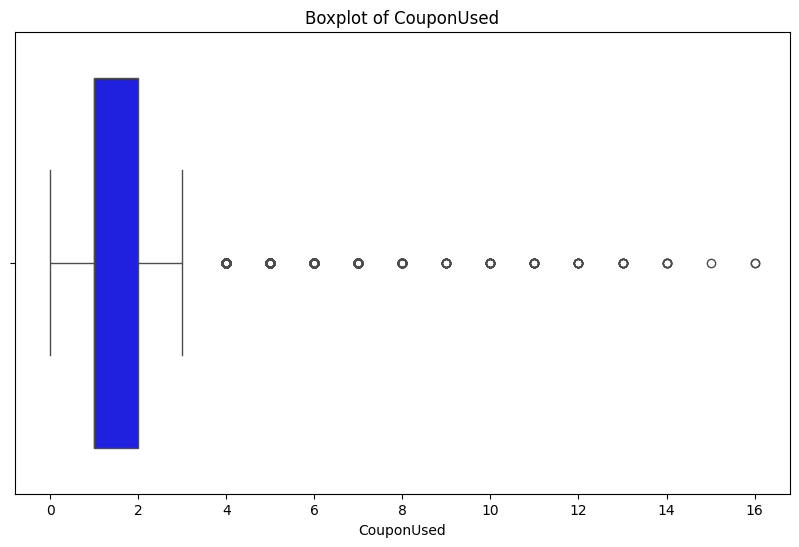

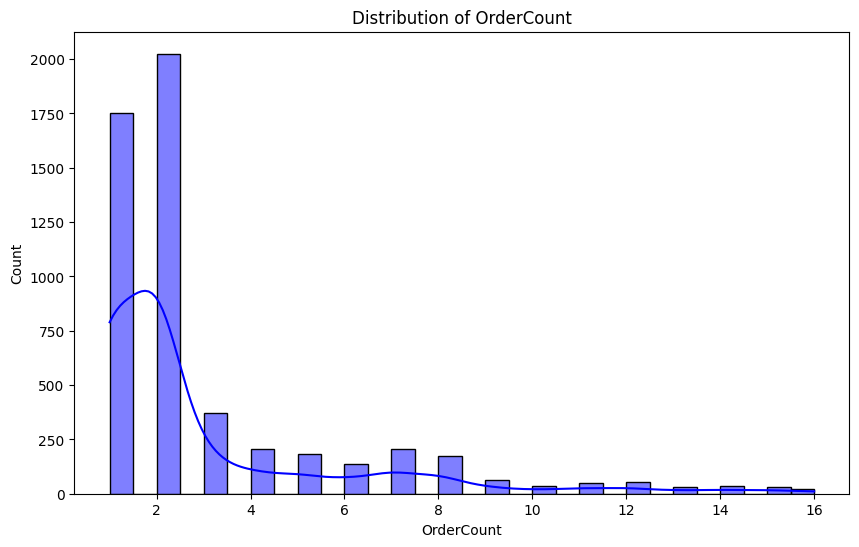

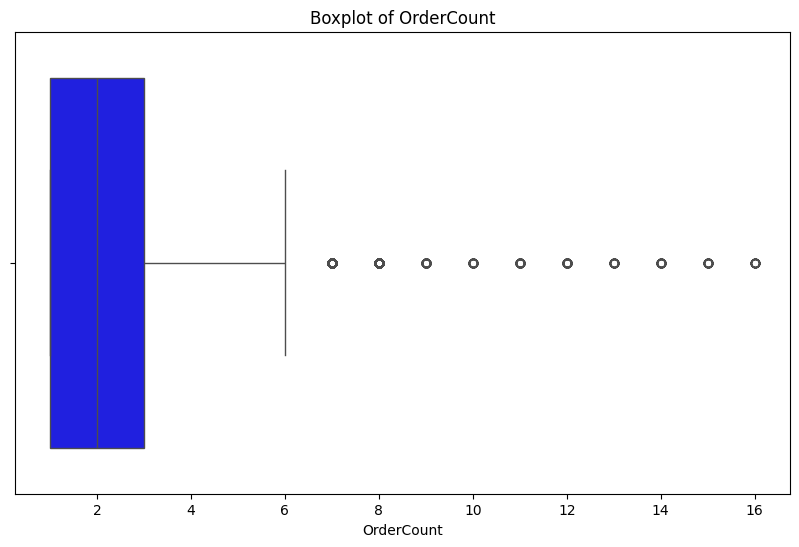

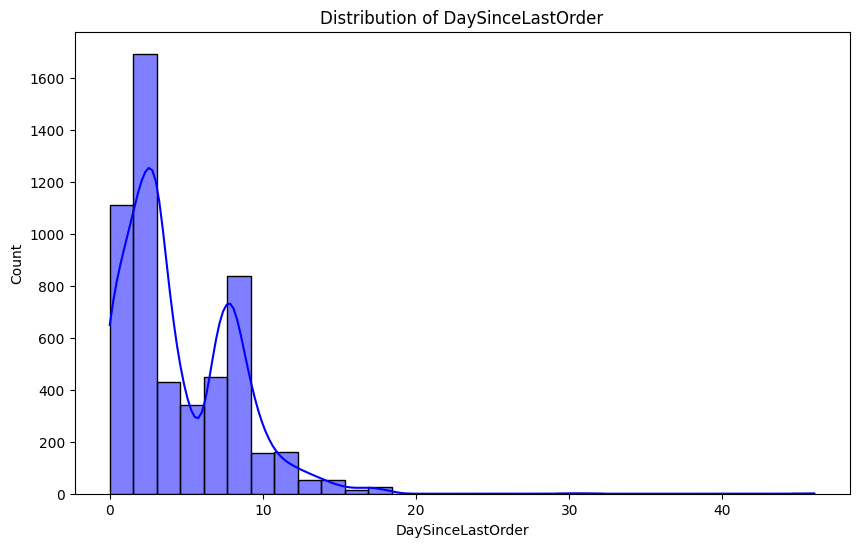

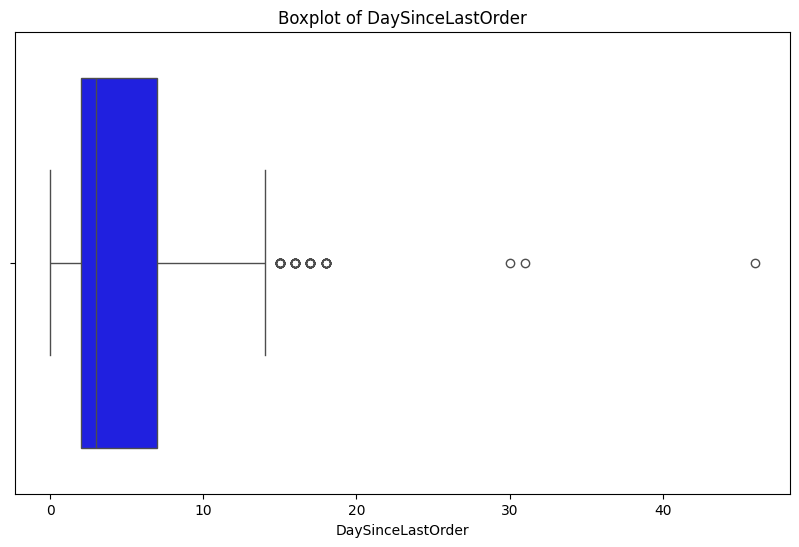

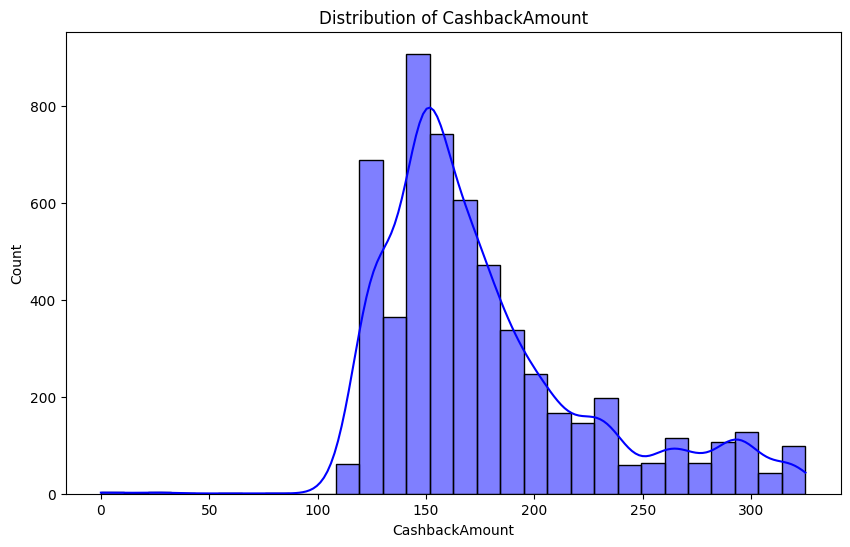

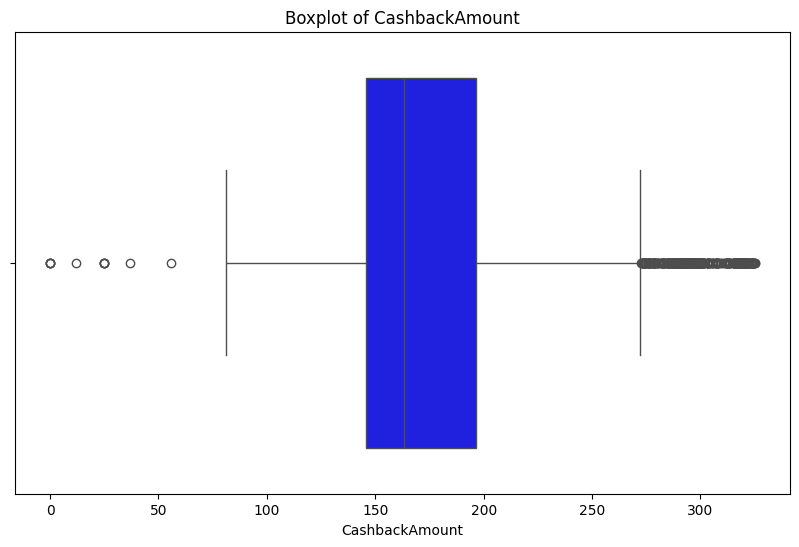

In [24]:


# Histograms and Boxplots for Numerical Features
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot of {col}')
    plt.show()


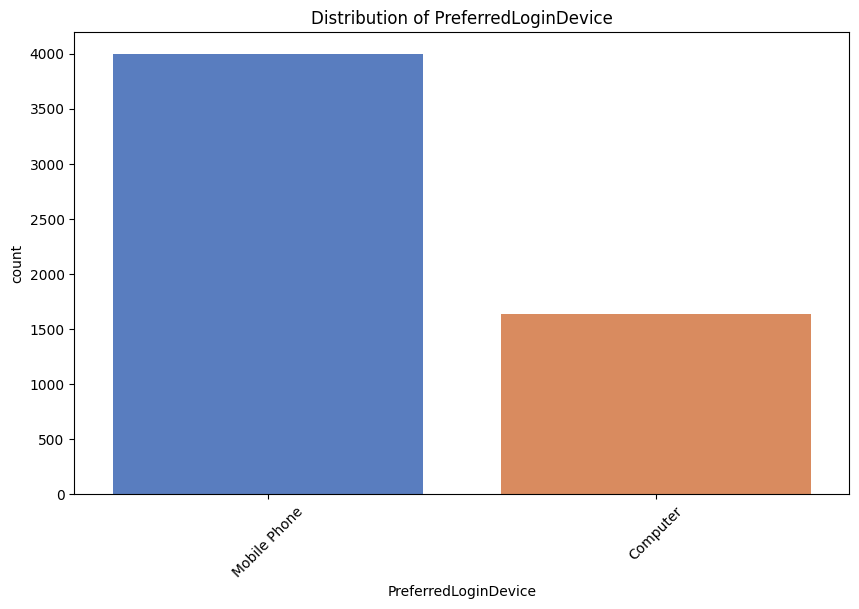

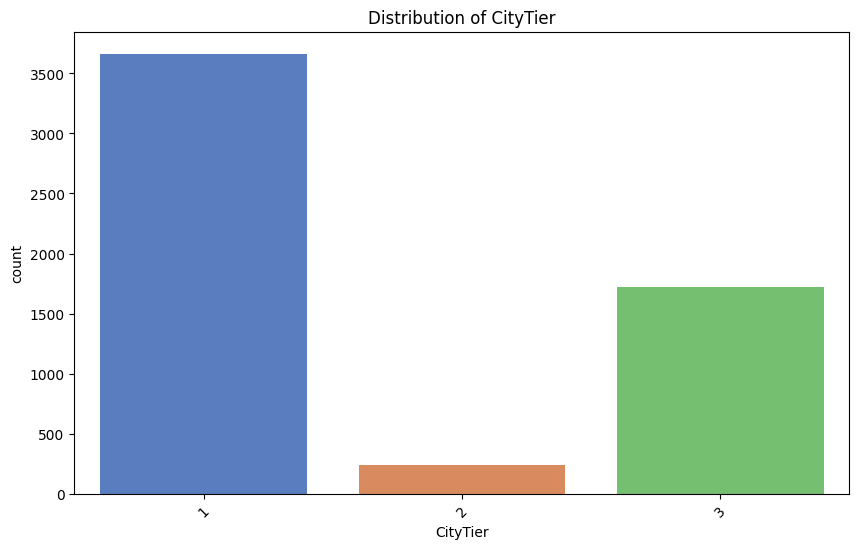

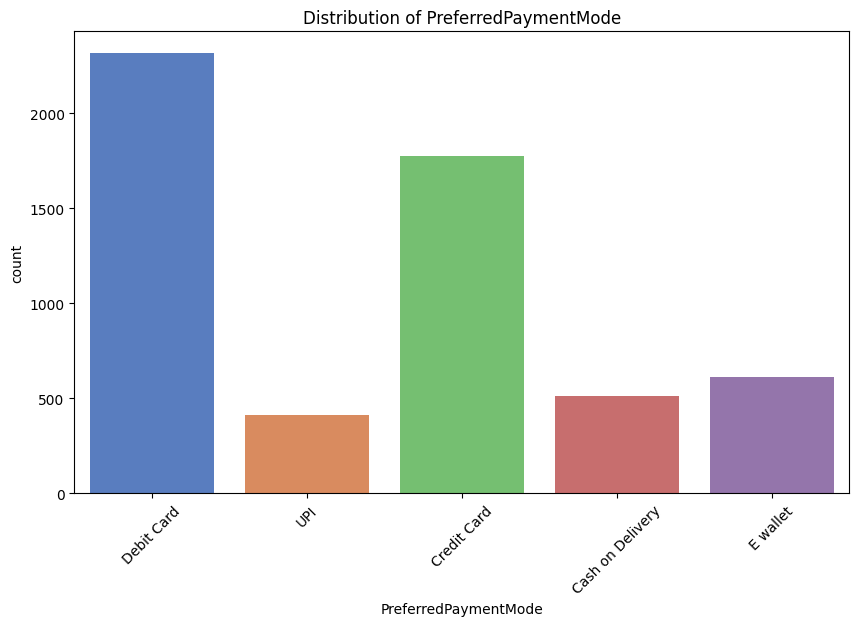

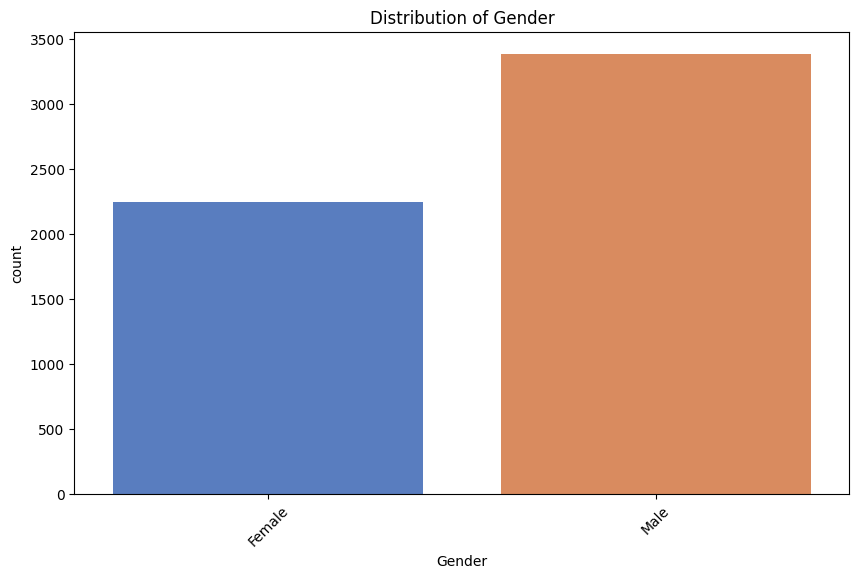

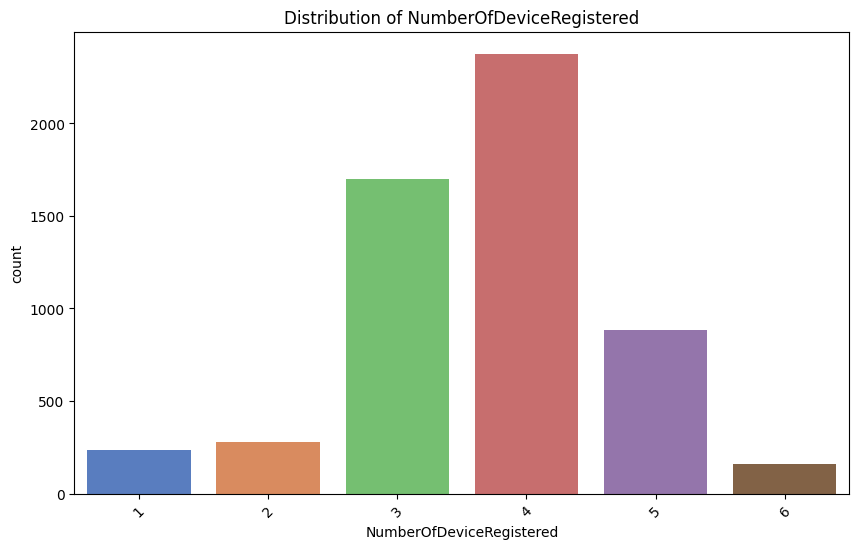

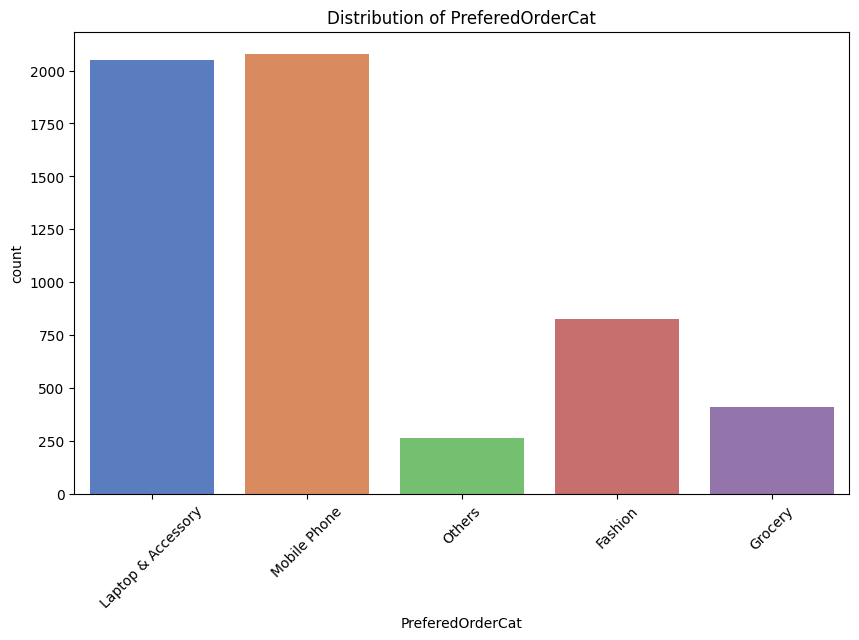

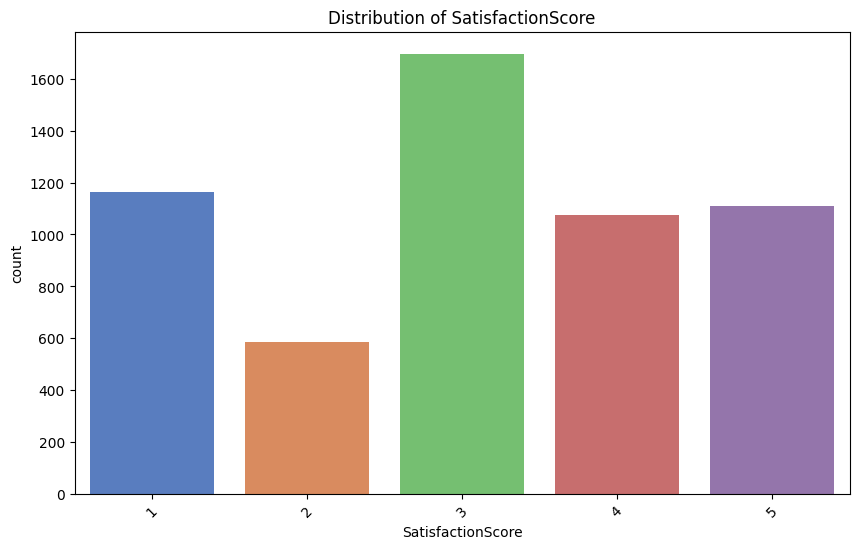

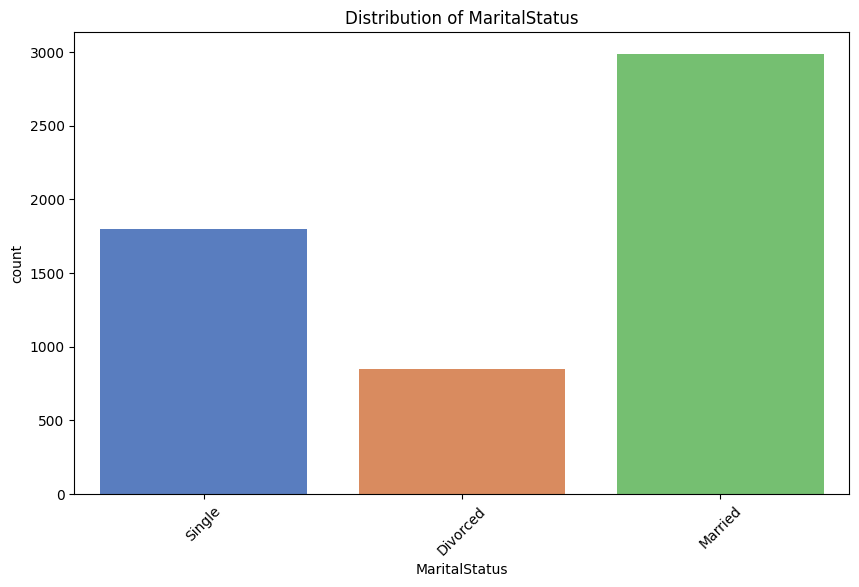

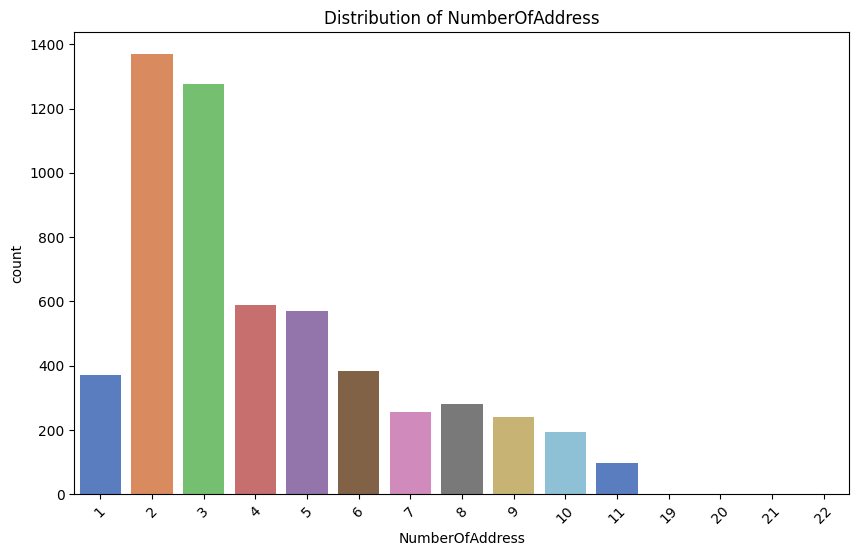

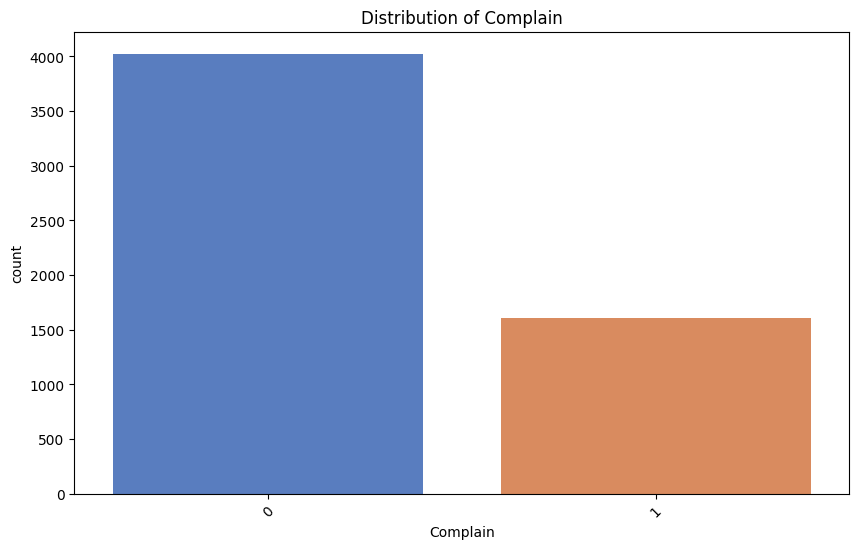

In [25]:
# Countplots for categorical features
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='muted')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


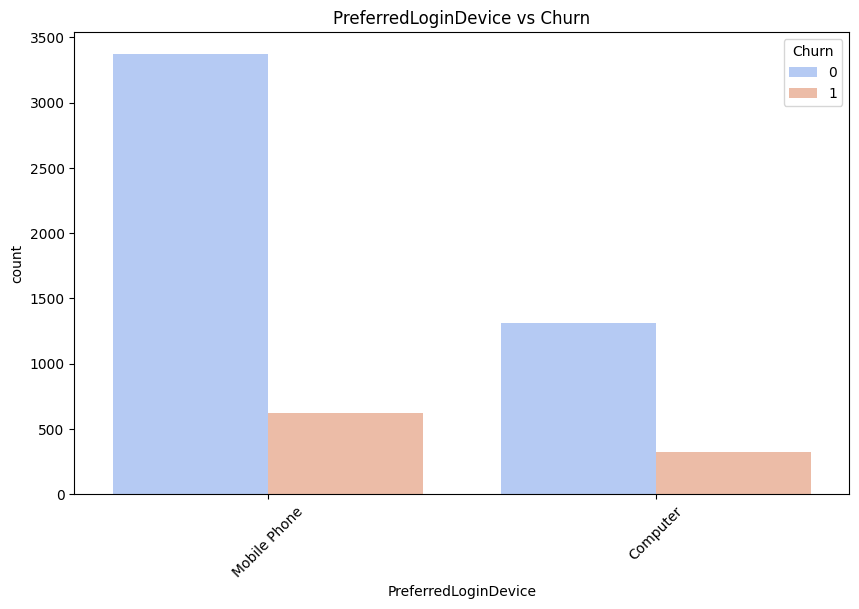

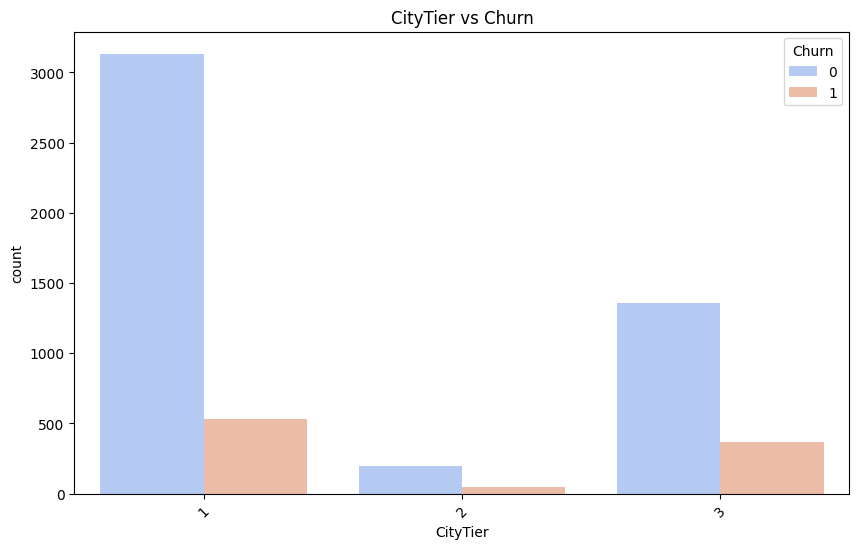

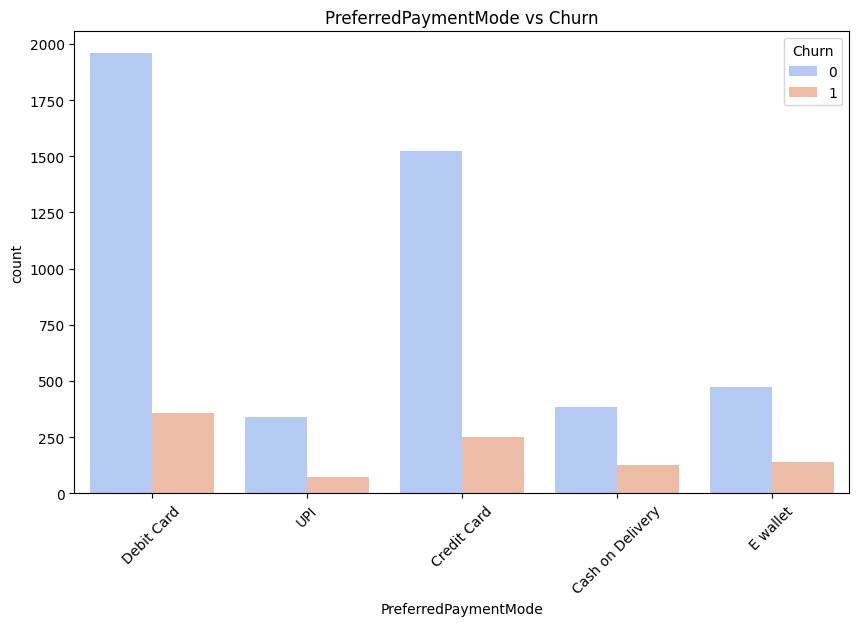

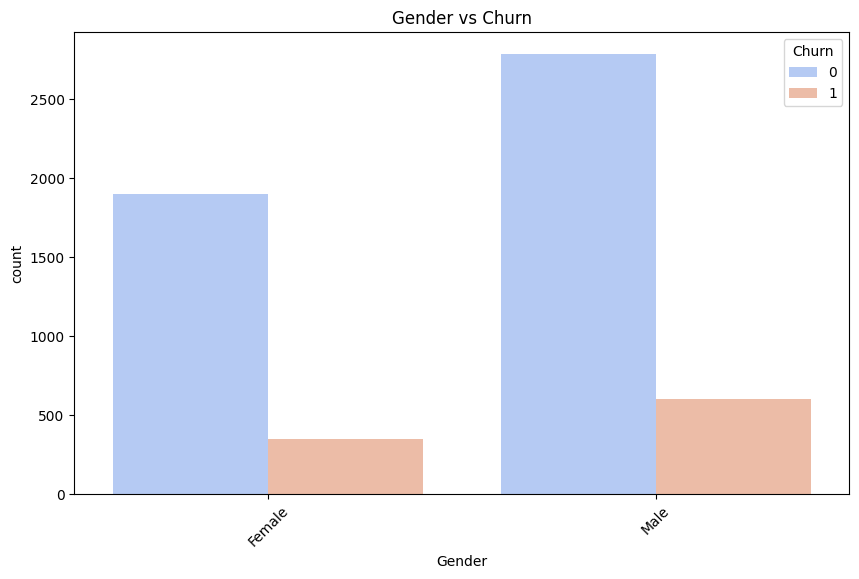

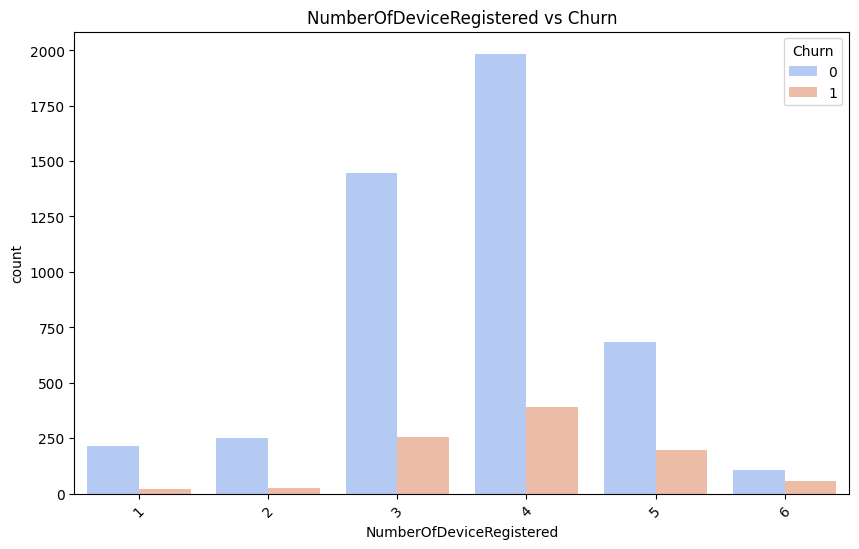

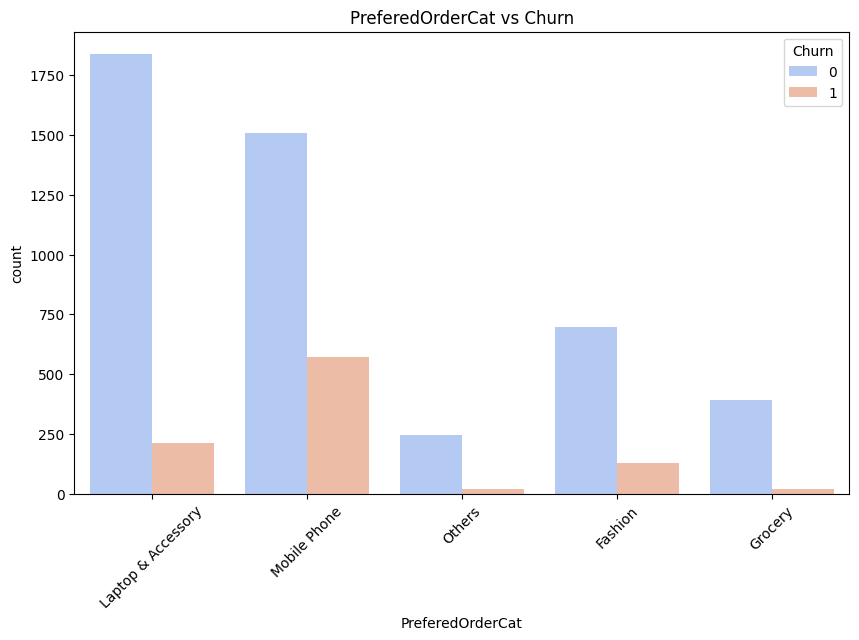

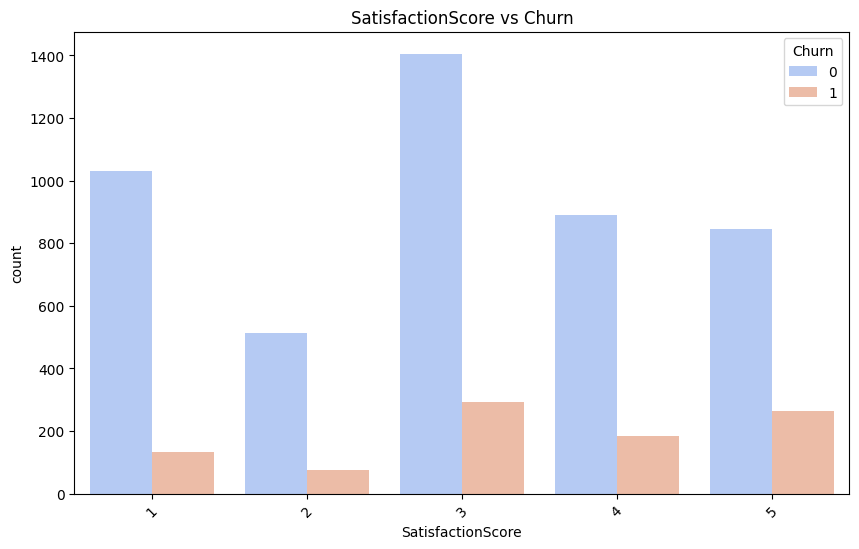

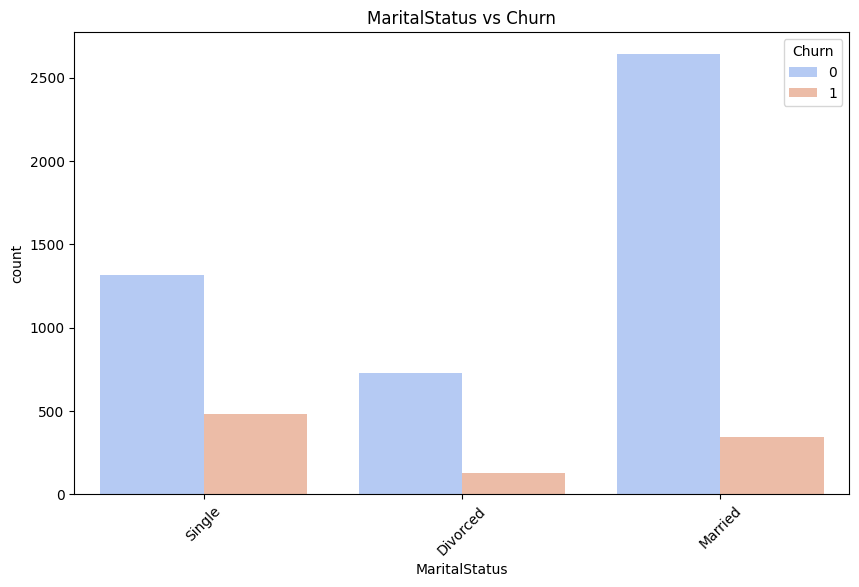

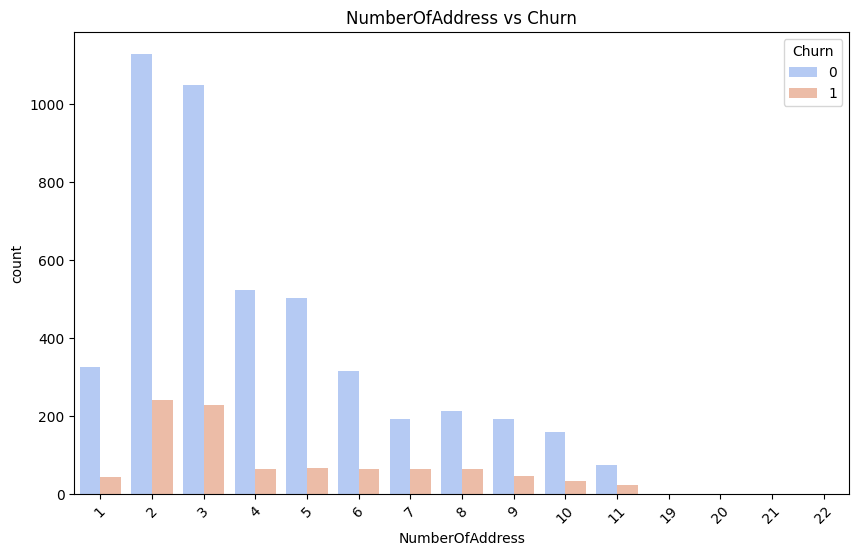

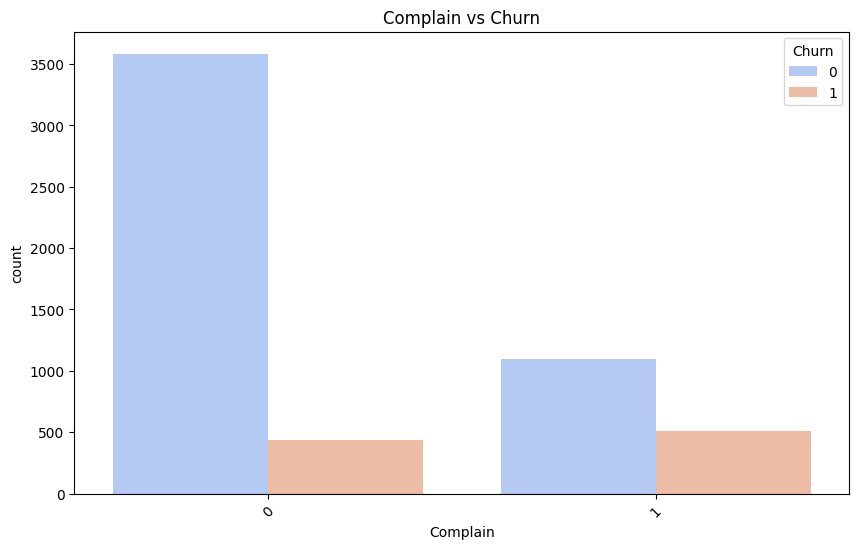

In [26]:
# Categorical variables against Churn
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


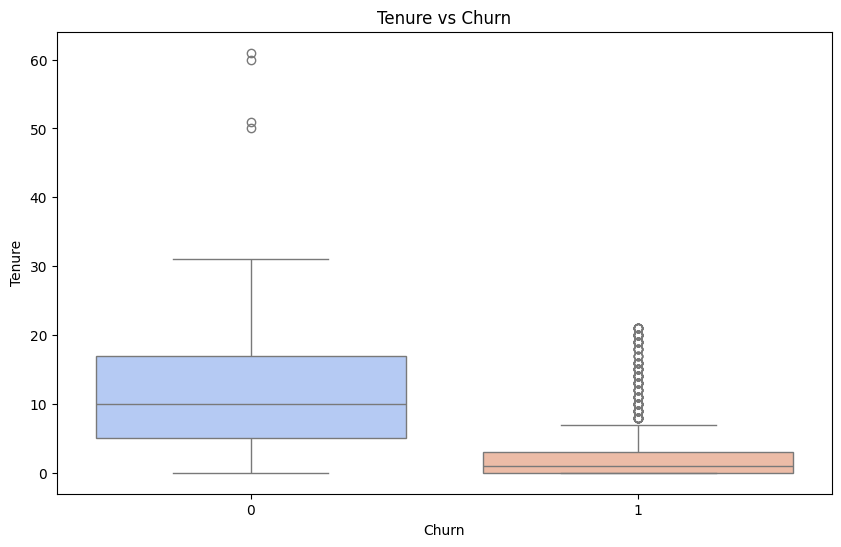

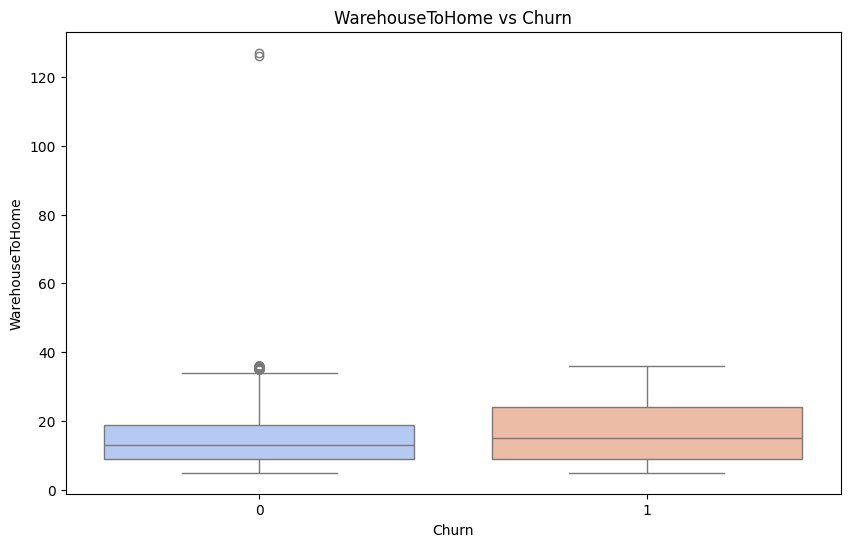

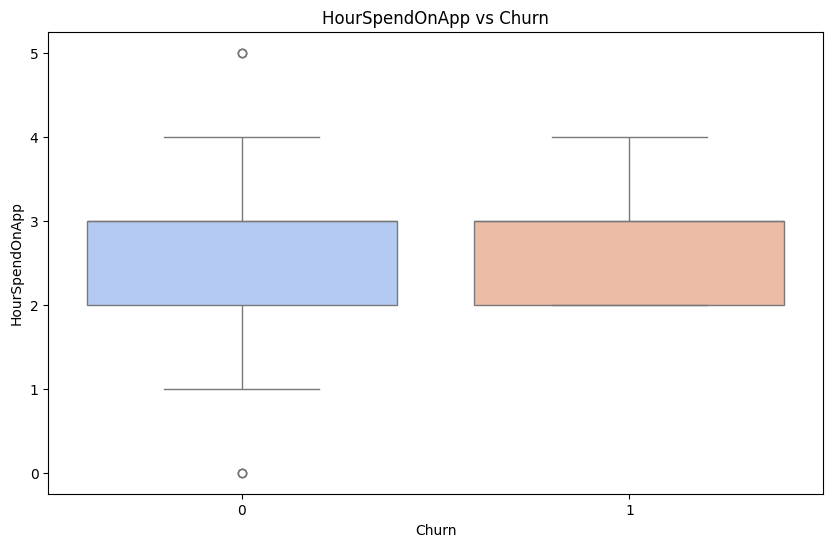

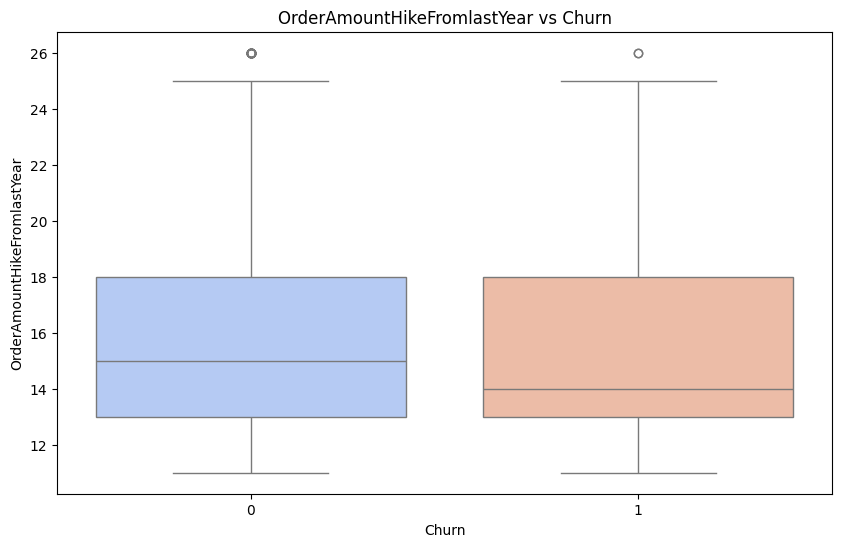

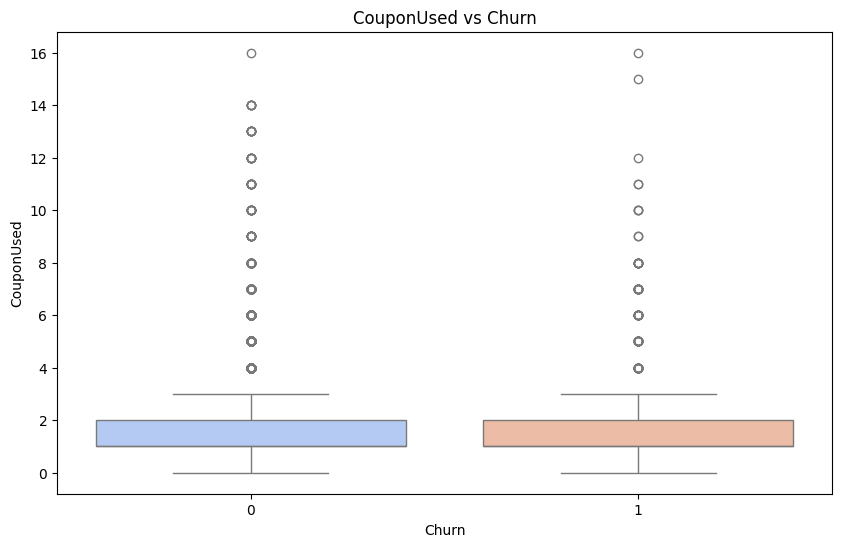

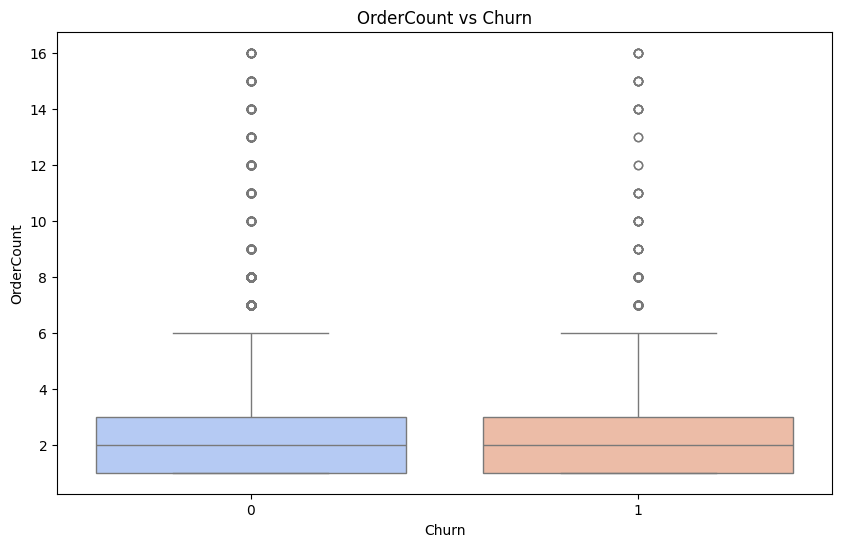

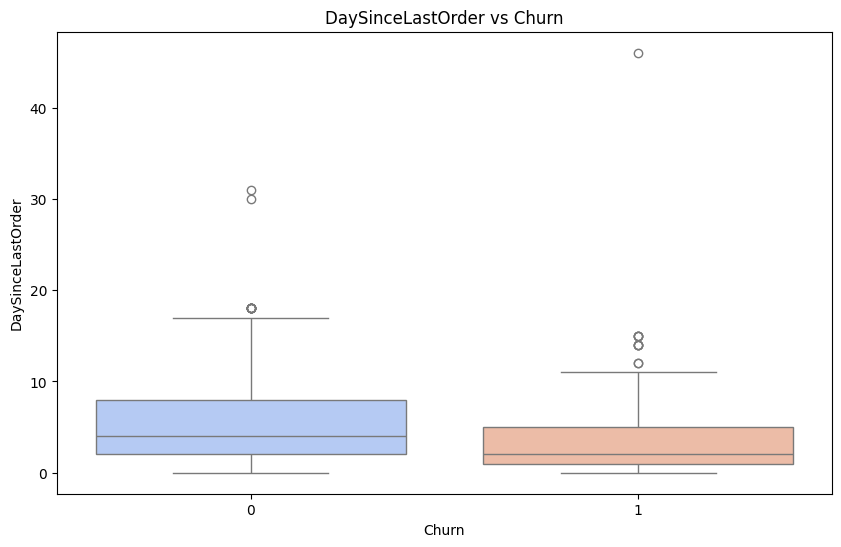

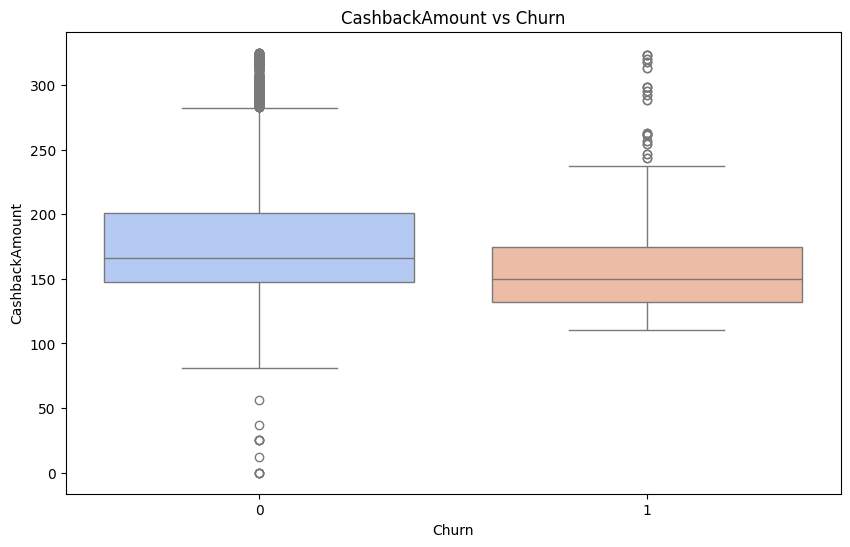

In [27]:
# Boxplots of numerical variables by Churn
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.show()


Churn                          1.000000
WarehouseToHome                0.076630
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
OrderCount                    -0.028697
CashbackAmount                -0.154118
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64


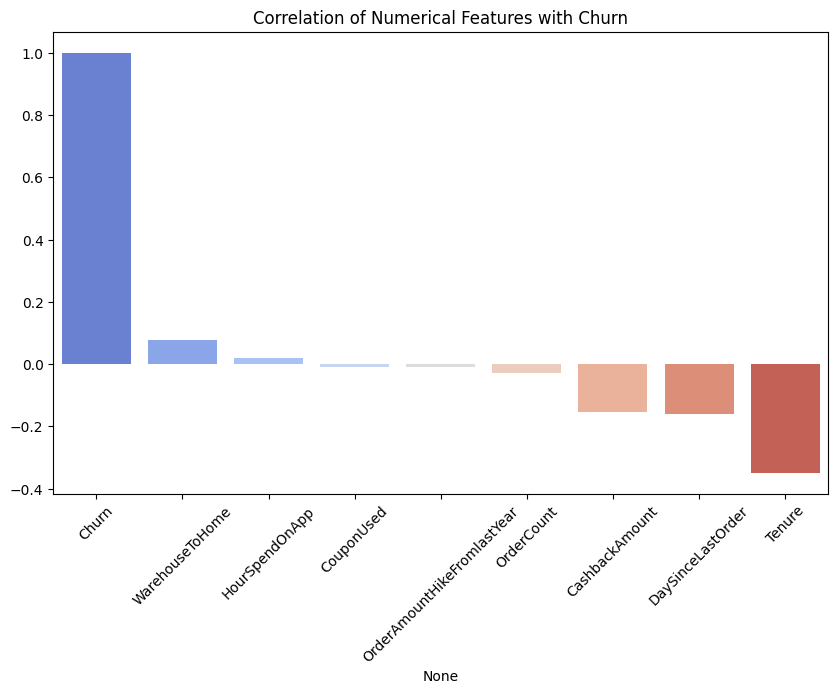

In [28]:
# Calculate correlation of numerical columns with Churn
correlation_with_churn = df[num_cols + ['Churn']].corr()['Churn'].sort_values(ascending=False)

# Display the correlation with Churn
print(correlation_with_churn)

# Plot the correlation of numerical features with Churn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='coolwarm')
plt.title('Correlation of Numerical Features with Churn')
plt.xticks(rotation=45)
plt.show()

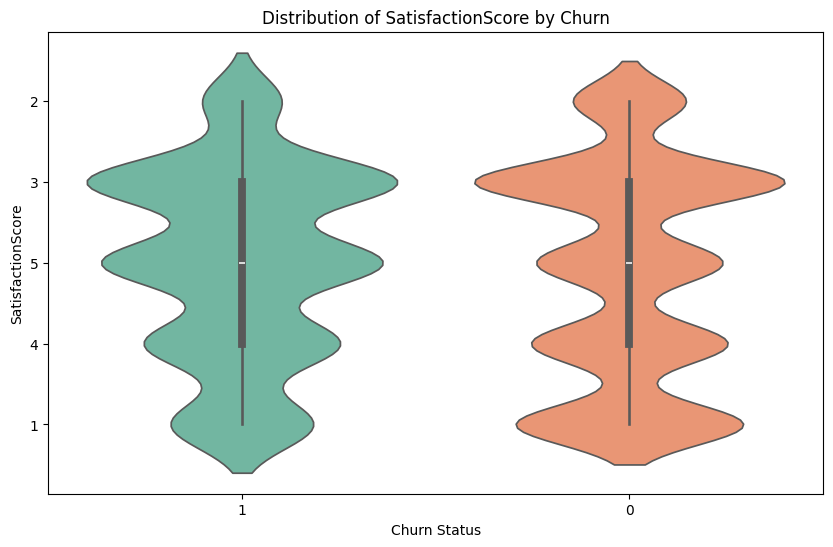

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for SatisfactionScore vs Churn
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='SatisfactionScore', data=df2, palette='Set2')
plt.title('Distribution of SatisfactionScore by Churn')
plt.xlabel('Churn Status')
plt.ylabel('SatisfactionScore')
plt.show()


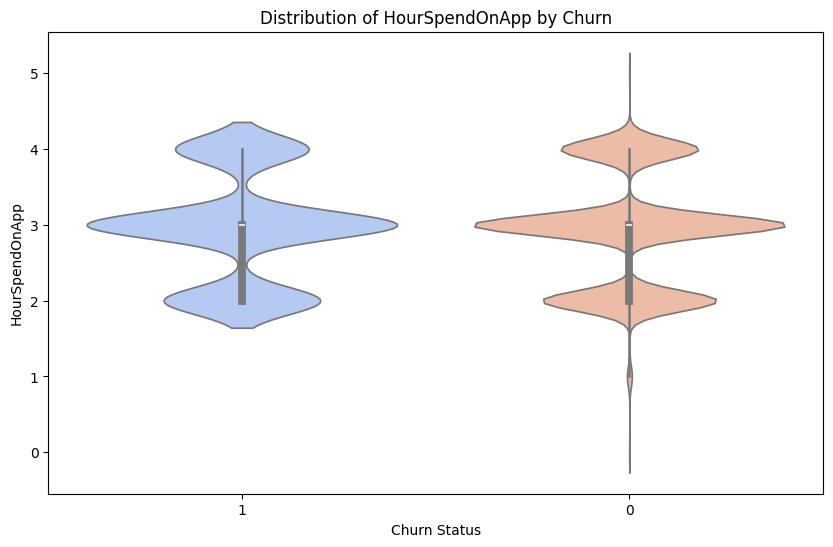

In [30]:
# Violin plot for HourSpendOnApp vs Churn
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='HourSpendOnApp', data=df2, palette='coolwarm')
plt.title('Distribution of HourSpendOnApp by Churn')
plt.xlabel('Churn Status')
plt.ylabel('HourSpendOnApp')
plt.show()


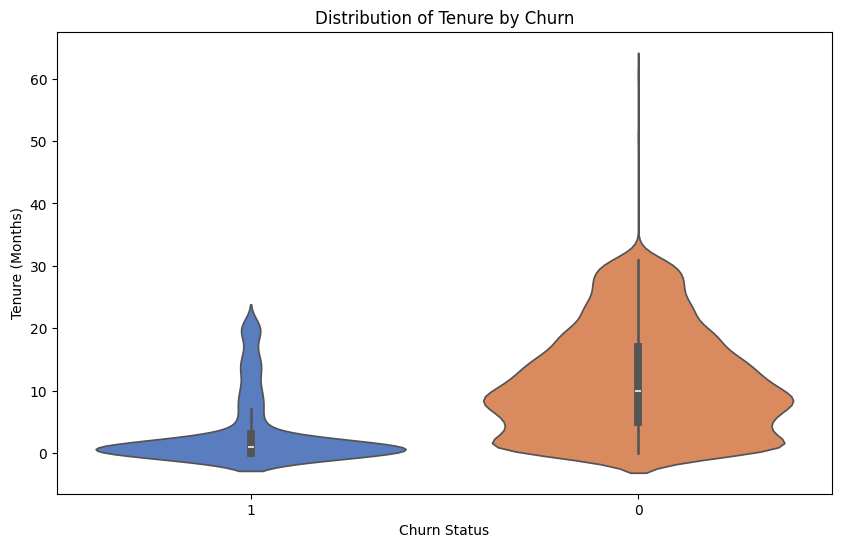

In [31]:
# Violin plot for Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Tenure', data=df2, palette='muted')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')
plt.show()


In [32]:
# Convert the 'Churn' column to integers
df2['Churn'] = df2['Churn'].astype(int)


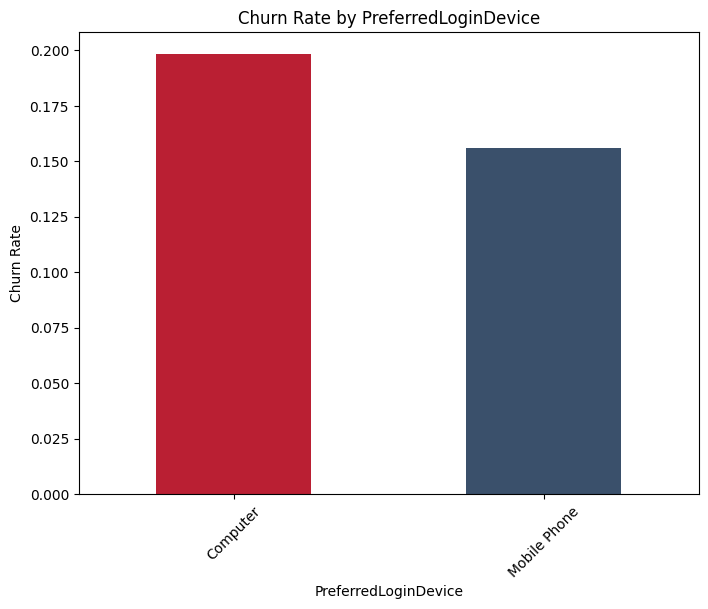

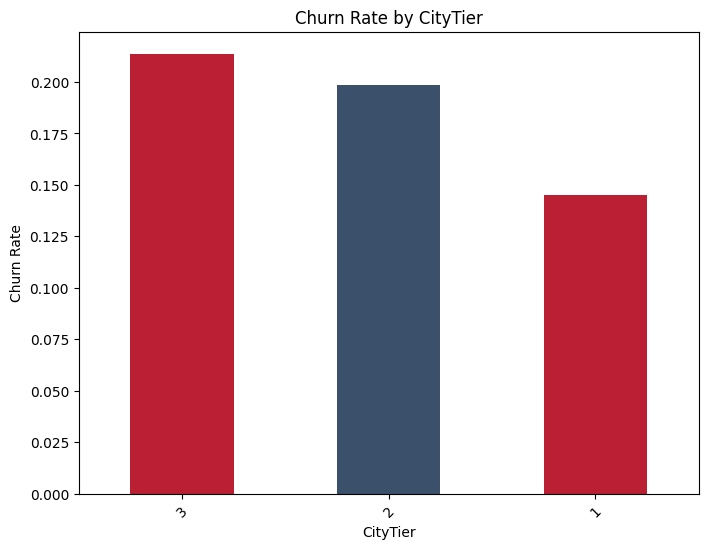

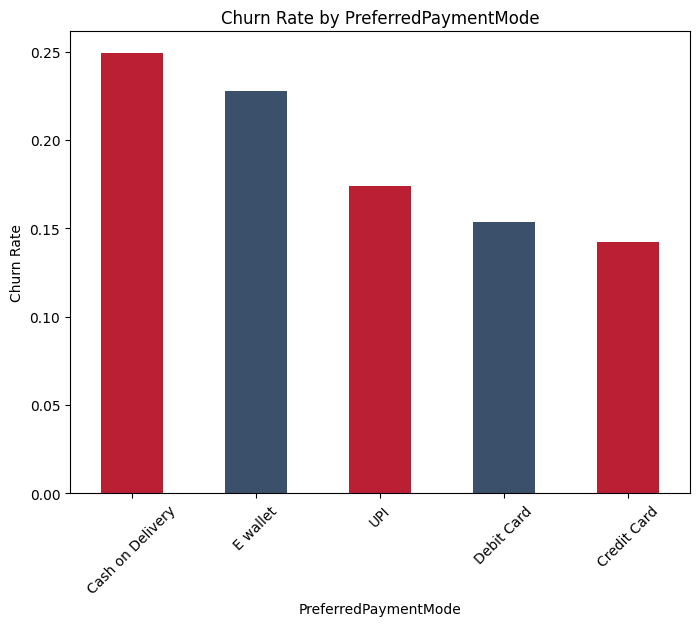

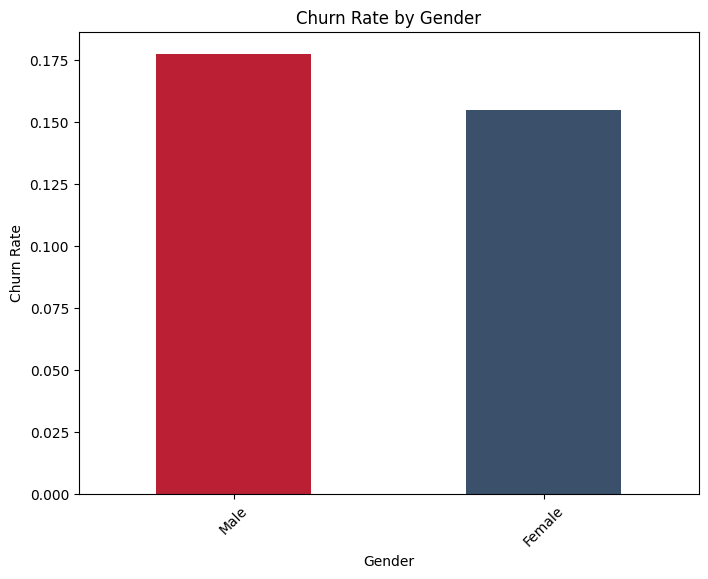

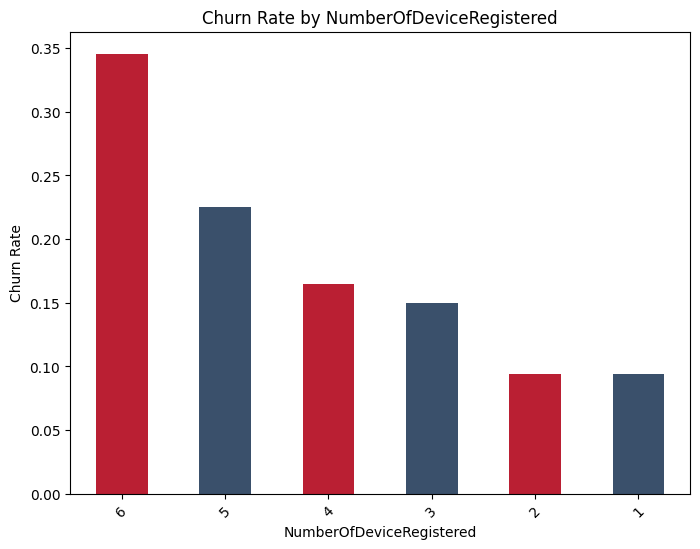

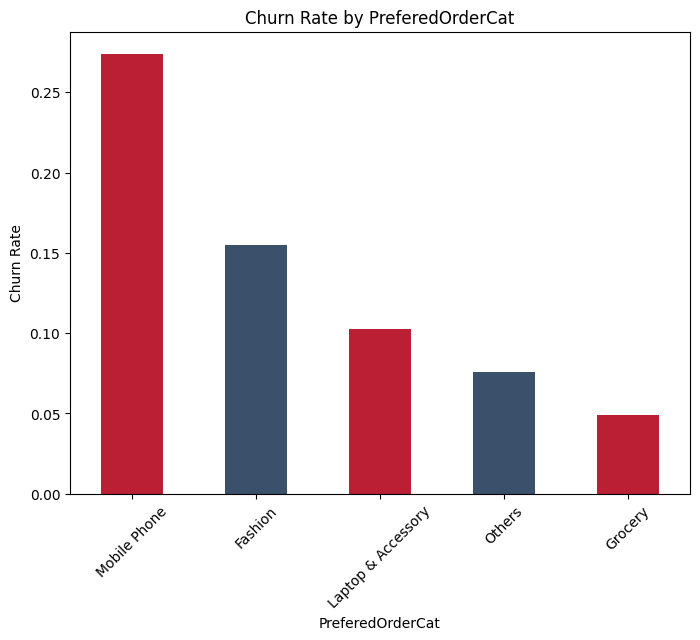

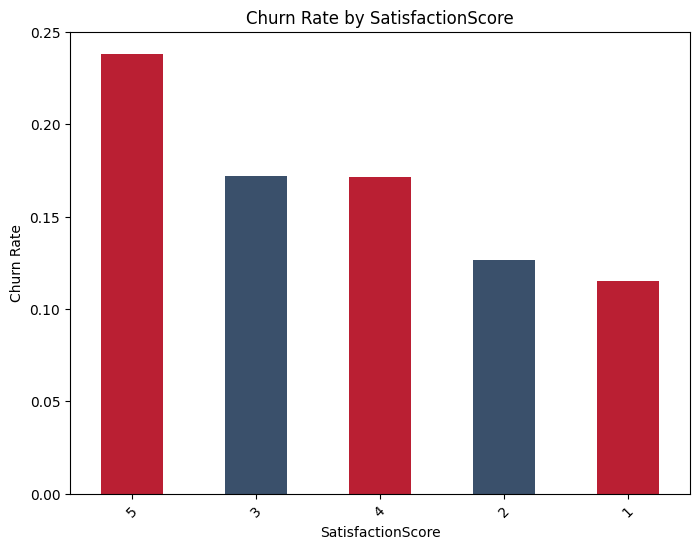

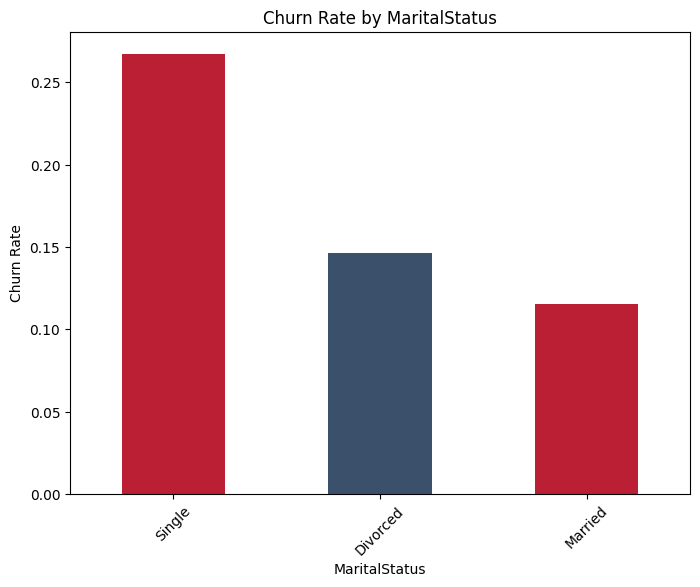

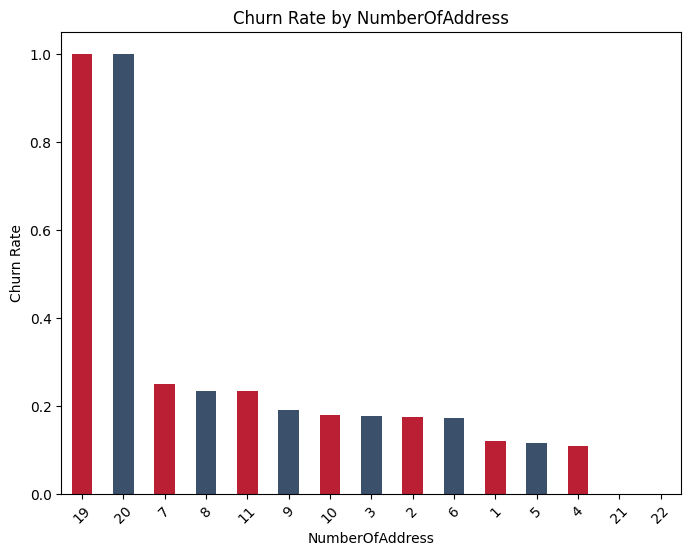

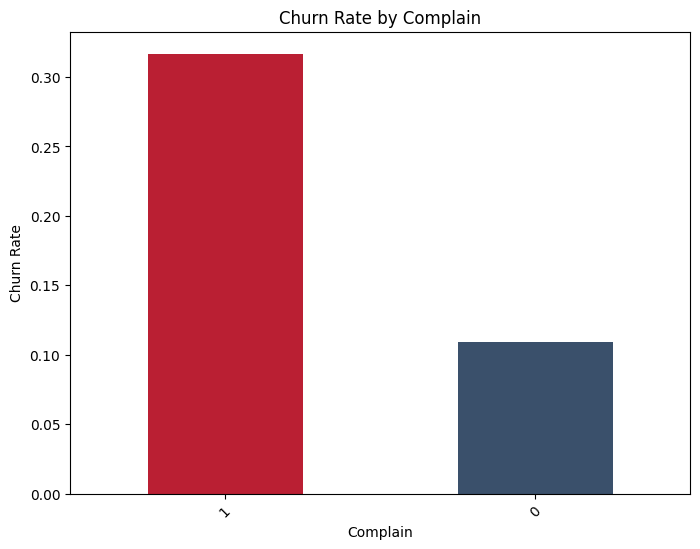

In [33]:
# Visualize churn rate for each categorical column
for col in cat_cols:
    churn_rate = df2.groupby(col)['Churn'].mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(8, 6))
    churn_rate.plot(kind='bar', color=['#BA1F33', '#3A506B'])
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()

#Data Preprocesing

**Handling missing values**

In [34]:
#checking for null values
columns = df2.columns.to_list()
grouped_data = []
for col in columns:
    n_missing = df2[col].isnull().sum()
    percentage = n_missing / df2.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['Column name', 'Number of missing values', 'Percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['Column name', 'Number of missing values', 'Percentage']).size()
result

,,,0
Column name,Number of missing values,Percentage,
CashbackAmount,0,0.000000,1
Churn,0,0.000000,1
CityTier,0,0.000000,1
Complain,0,0.000000,1
CouponUsed,256,4.547069,1
DaySinceLastOrder,307,5.452931,1
Gender,0,0.000000,1
HourSpendOnApp,255,4.529307,1
MaritalStatus,0,0.000000,1


In [35]:
# Fill numerical columns with missing values with the median
df2['Tenure'] = df2['Tenure'].fillna(df2['Tenure'].median())
df2['WarehouseToHome'] = df2['WarehouseToHome'].fillna(df2['WarehouseToHome'].median())
df2['HourSpendOnApp'] = df2['HourSpendOnApp'].fillna(df2['HourSpendOnApp'].median())
df2['OrderAmountHikeFromlastYear'] = df2['OrderAmountHikeFromlastYear'].fillna(df2['OrderAmountHikeFromlastYear'].median())
df2['CouponUsed'] = df2['CouponUsed'].fillna(df2['CouponUsed'].median())
df2['OrderCount'] = df2['OrderCount'].fillna(df2['OrderCount'].median())
df2['DaySinceLastOrder'] = df2['DaySinceLastOrder'].fillna(df2['DaySinceLastOrder'].median())


In [36]:
# Replace missing values in 'DaySinceLastOrder' with the maximum value of the column
max_day_since_last_order = df2['DaySinceLastOrder'].max()
df2['DaySinceLastOrder'] = df2['DaySinceLastOrder'].fillna(max_day_since_last_order)


In [37]:
# Check if there are still missing values after imputation
missing_values_after = df2.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)


Missing values after imputation:
 Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


**Encoding features**

In [38]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Binary or Ordinal columns
label_encoder = LabelEncoder()

# Label Encoding for Binary or Ordinal Columns
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2['SatisfactionScore'] = label_encoder.fit_transform(df2['SatisfactionScore'])
df2['MaritalStatus'] = label_encoder.fit_transform(df2['MaritalStatus'])
df2['Complain'] = label_encoder.fit_transform(df2['Complain'])

# One-Hot Encoding for Nominal Columns
df2 = pd.get_dummies(df2, columns=['PreferredLoginDevice', 'PreferredPaymentMode',
                                   'PreferedOrderCat', 'CityTier'], drop_first=True)
print(df2.dtypes)




Churn                                    int64
Tenure                                 float64
WarehouseToHome                        float64
Gender                                   int64
HourSpendOnApp                         float64
NumberOfDeviceRegistered                object
SatisfactionScore                        int64
MaritalStatus                            int64
NumberOfAddress                         object
Complain                                 int64
OrderAmountHikeFromlastYear            float64
CouponUsed                             float64
OrderCount                             float64
DaySinceLastOrder                      float64
CashbackAmount                         float64
PreferredLoginDevice_Mobile Phone         bool
PreferredPaymentMode_Credit Card          bool
PreferredPaymentMode_Debit Card           bool
PreferredPaymentMode_E wallet             bool
PreferredPaymentMode_UPI                  bool
PreferedOrderCat_Grocery                  bool
PreferedOrder

In [39]:
df2['NumberOfDeviceRegistered'] = df2['NumberOfDeviceRegistered'].astype('int64')
df2['NumberOfAddress'] = df2['NumberOfAddress'].astype('int64')
print(df2.dtypes)


Churn                                    int64
Tenure                                 float64
WarehouseToHome                        float64
Gender                                   int64
HourSpendOnApp                         float64
NumberOfDeviceRegistered                 int64
SatisfactionScore                        int64
MaritalStatus                            int64
NumberOfAddress                          int64
Complain                                 int64
OrderAmountHikeFromlastYear            float64
CouponUsed                             float64
OrderCount                             float64
DaySinceLastOrder                      float64
CashbackAmount                         float64
PreferredLoginDevice_Mobile Phone         bool
PreferredPaymentMode_Credit Card          bool
PreferredPaymentMode_Debit Card           bool
PreferredPaymentMode_E wallet             bool
PreferredPaymentMode_UPI                  bool
PreferedOrderCat_Grocery                  bool
PreferedOrder

**Handling outliers**

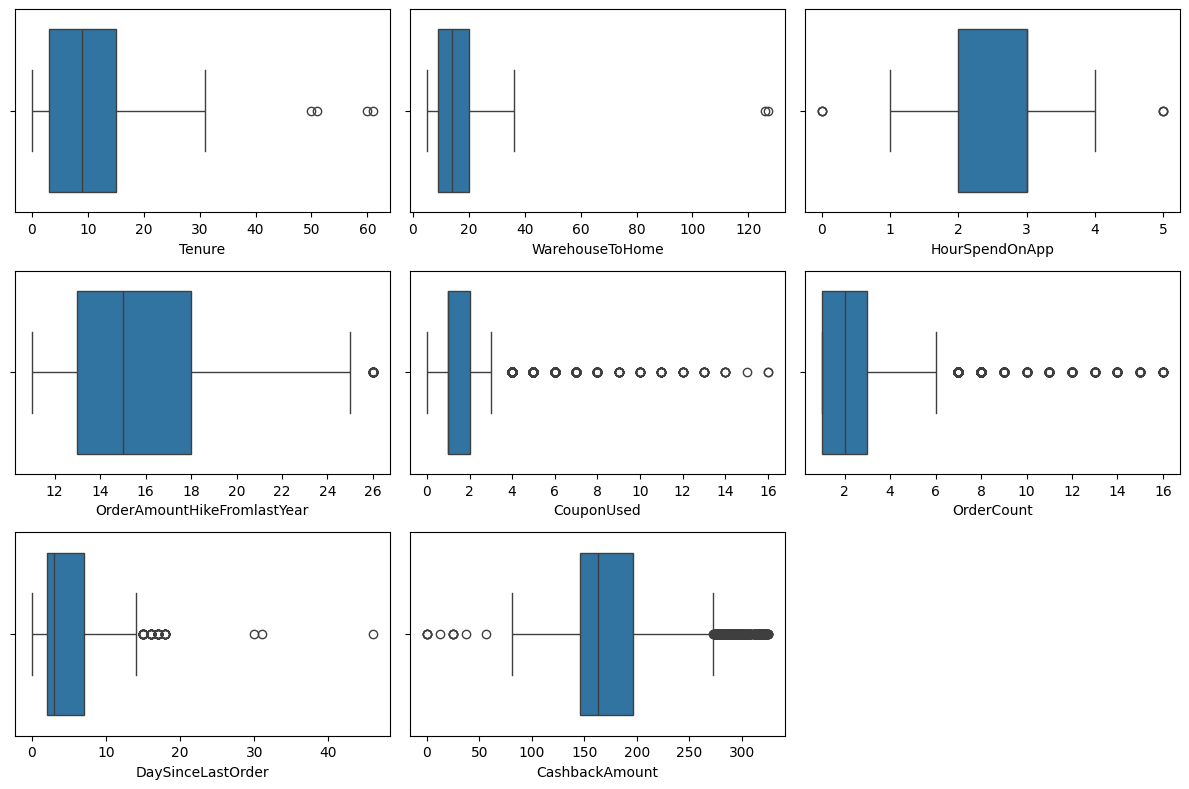

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create a boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Create subplots in a grid (3x3 for 9 columns)
    sns.boxplot(data=df2, x=col)
    plt.tight_layout()

plt.show()


In [41]:
import numpy as np
import pandas as pd

# List of numerical columns
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Initialize a dictionary to store the number of outliers handled per column
outliers_handled = {}

# Iterate through each numerical column and handle outliers
for col in num_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    lower_outliers = df2[col] < lower_bound
    upper_outliers = df2[col] > upper_bound

    # Count number of outliers
    total_outliers = lower_outliers.sum() + upper_outliers.sum()

    # Capping the outliers: Replace with the lower or upper bound
    df2[col] = np.where(df2[col] < lower_bound, lower_bound, df2[col])
    df2[col] = np.where(df2[col] > upper_bound, upper_bound, df2[col])

    # Store the count of outliers handled
    outliers_handled[col] = total_outliers

# Print out how many outliers were handled for each feature
print("Outliers Handled (Capping Applied):")
for col, count in outliers_handled.items():
    print(f"{col}: {count} outliers handled.")


Outliers Handled (Capping Applied):
Tenure: 4 outliers handled.
WarehouseToHome: 2 outliers handled.
HourSpendOnApp: 6 outliers handled.
OrderAmountHikeFromlastYear: 33 outliers handled.
CouponUsed: 629 outliers handled.
OrderCount: 703 outliers handled.
DaySinceLastOrder: 62 outliers handled.
CashbackAmount: 438 outliers handled.


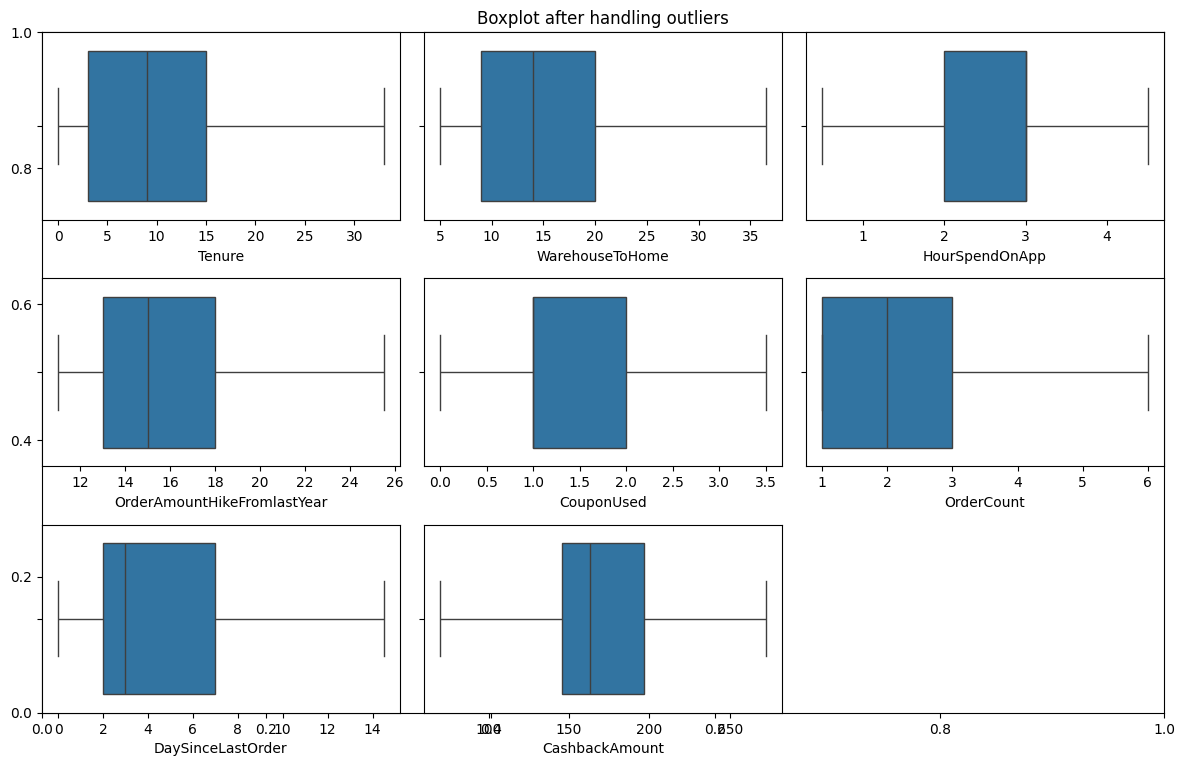

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each numerical column
plt.figure(figsize=(12, 8))
plt.title(f'Boxplot after handling outliers')

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Create subplots in a grid (3x3 for 9 columns)
    sns.boxplot(data=df2, x=col)
    plt.tight_layout()

plt.show()


**Scaling the numerical features**

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply scaling only to numerical columns
df2[num_cols] = scaler.fit_transform(df2[num_cols])


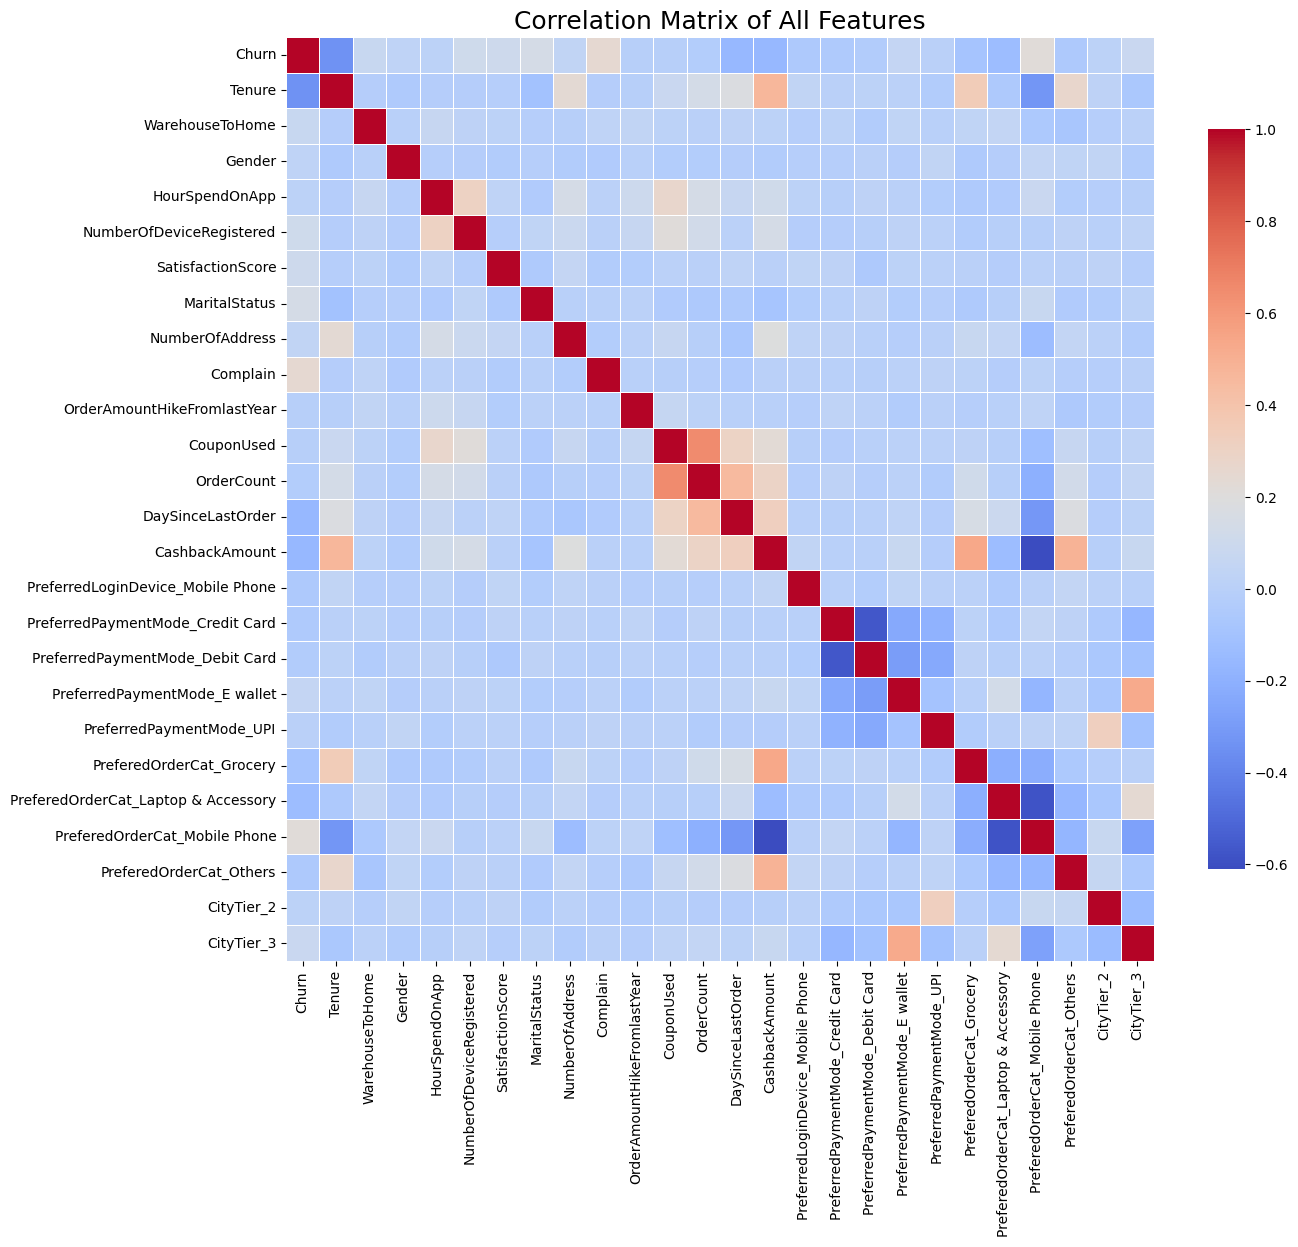

In [44]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Set the size of the plot
plt.figure(figsize=(14, 12))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': .8})

# Title and labels
plt.title("Correlation Matrix of All Features", fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Preparing the Dataset and Handling Imbalanced Class  

In [45]:
#Train test split
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis=1)  # Feature columns
y = df2['Churn']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

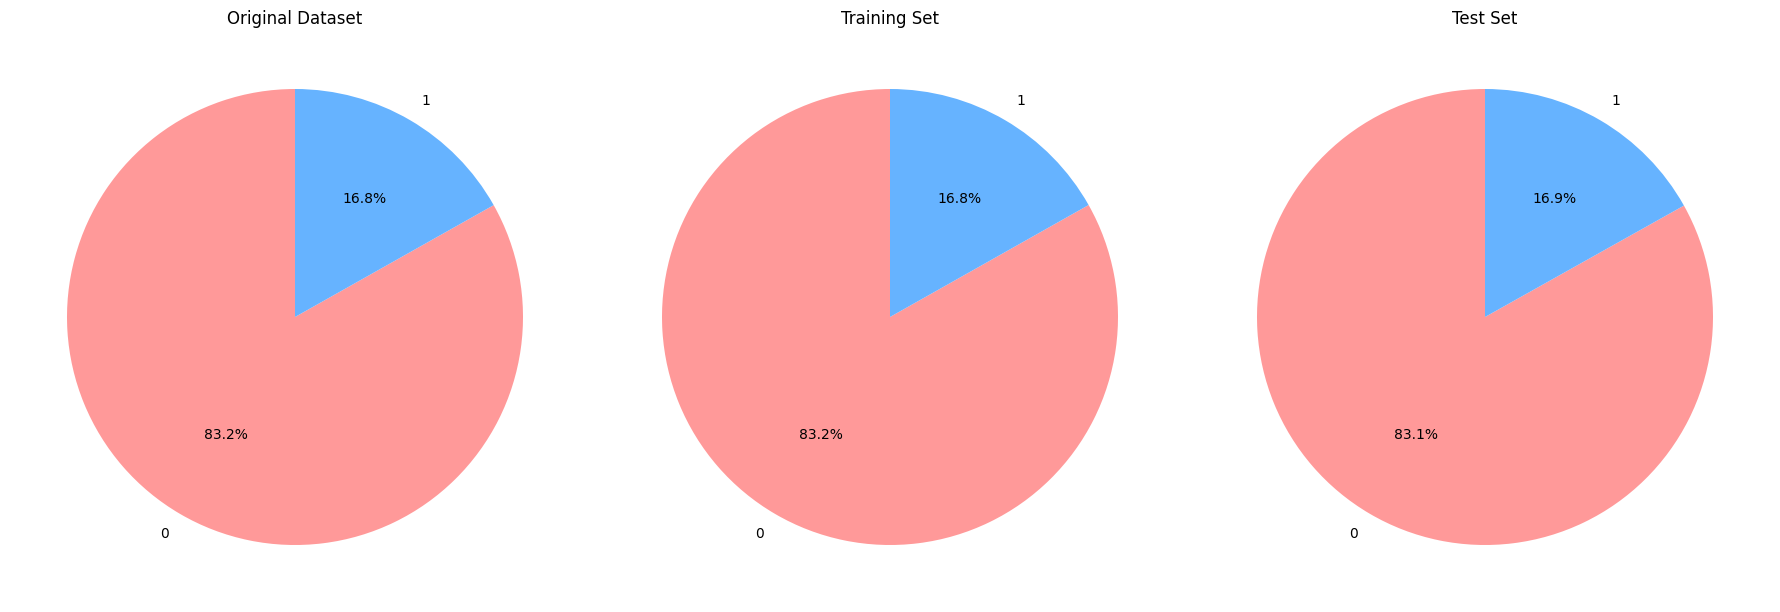

In [46]:
import matplotlib.pyplot as plt

# Function to plot class distribution as a pie chart
def plot_class_pie_chart(ax, data, title):
    class_counts = data.value_counts()
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
    ax.set_title(title)

# Create a figure with 1 row and 3 columns for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie charts in the subplots
plot_class_pie_chart(axes[0], y, "Original Dataset")
plot_class_pie_chart(axes[1], y_train, "Training Set")
plot_class_pie_chart(axes[2], y_test, "Test Set")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [47]:
#Oversampling (SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training ML model

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, f1_score, make_scorer, fbeta_score

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**5-fold cross validation and Evaluation**

In [49]:

random_state = 42

# Define Cross-Validation (with fixed random_state for reproducibility)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Define the Models (with fixed random_state where applicable)
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=random_state),
    "Random Forest": RandomForestClassifier(random_state=random_state)
}

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate models using Cross-Validation
results = []

for model_name, model in models.items():
    # Cross-Validation for Recall (class 1)
    recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='recall')

    # Cross-Validation for F2-Score
    f2_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring=f2_scorer)

    # Calculate Mean and Standard Deviation of Recall and F2-Score
    mean_recall = recall_scores.mean()
    std_recall = recall_scores.std()
    mean_f2 = f2_scores.mean()
    std_f2 = f2_scores.std()

    # Store results
    results.append([model_name, mean_recall, mean_f2, std_recall, std_f2])

# Create DataFrame to store results for easy comparison
cv_results_df = pd.DataFrame(results, columns=["Model", "Mean Recall", "Mean F2-Score", "Recall Std", "F2-Score Std"])

# Show the Results
cv_results_df

,Model,Mean Recall,Mean F2-Score,Recall Std,F2-Score Std
0,Logistic Regression,0.829422,0.822548,0.010388,0.007672
1,KNN,0.992258,0.962208,0.002297,0.002713
2,SVM,0.868930,0.857846,0.009262,0.008945
3,Random Forest,0.976775,0.975823,0.008470,0.005780


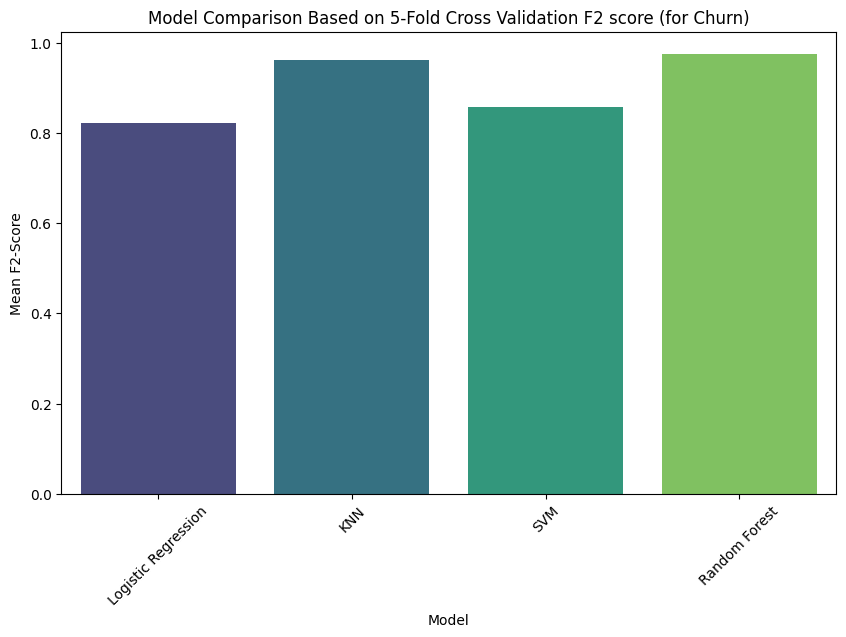

In [50]:
# Plotting Mean Recall for Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean F2-Score', data=cv_results_df, palette='viridis')
plt.title('Model Comparison Based on 5-Fold Cross Validation F2 score (for Churn)')
plt.xlabel('Model')
plt.ylabel('Mean F2-Score')
plt.xticks(rotation=45)
plt.show()


Best Model Based on F2-Score: Random Forest

Test Recall: 0.947
Test F1-Score: 0.930
Test Precision: 0.914
Test Accuracy: 0.976
Test F2-Score: 0.940



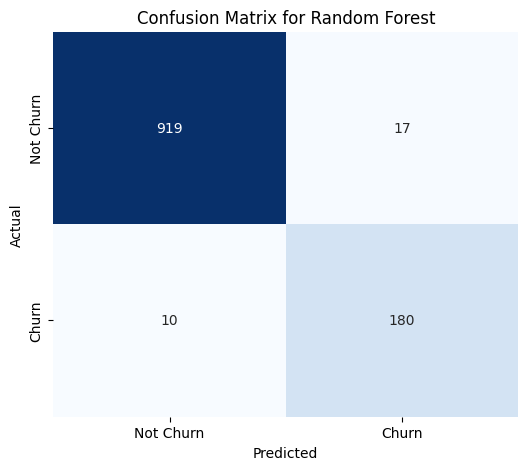

In [51]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, fbeta_score
import matplotlib.pyplot as plt

# Select the Best Model (based on F2-Score)
best_model_name = cv_results_df.loc[cv_results_df['Mean F2-Score'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nBest Model Based on F2-Score: {best_model_name}")

# Fit the Best Model on the Entire Training Set (after SMOTE)
best_model.fit(X_train_resampled, y_train_resampled)

# Make Predictions on the Test Set
y_pred = best_model.predict(X_test)

# Evaluate Performance on Test Data
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
test_f2 = fbeta_score(y_test, y_pred, beta=2)

print(f"\nTest Recall: {test_recall:.3f}")
print(f"Test F1-Score: {test_f1:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test F2-Score: {test_f2:.3f}")
print("")
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"], cbar=False)

# Title and labels
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

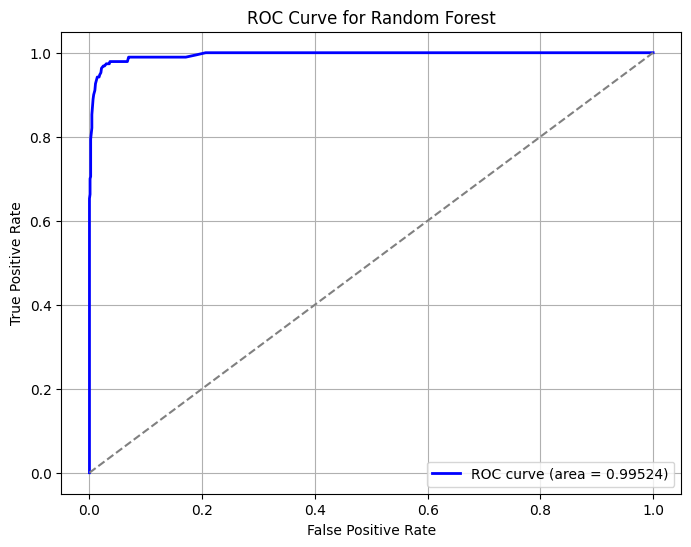

In [52]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


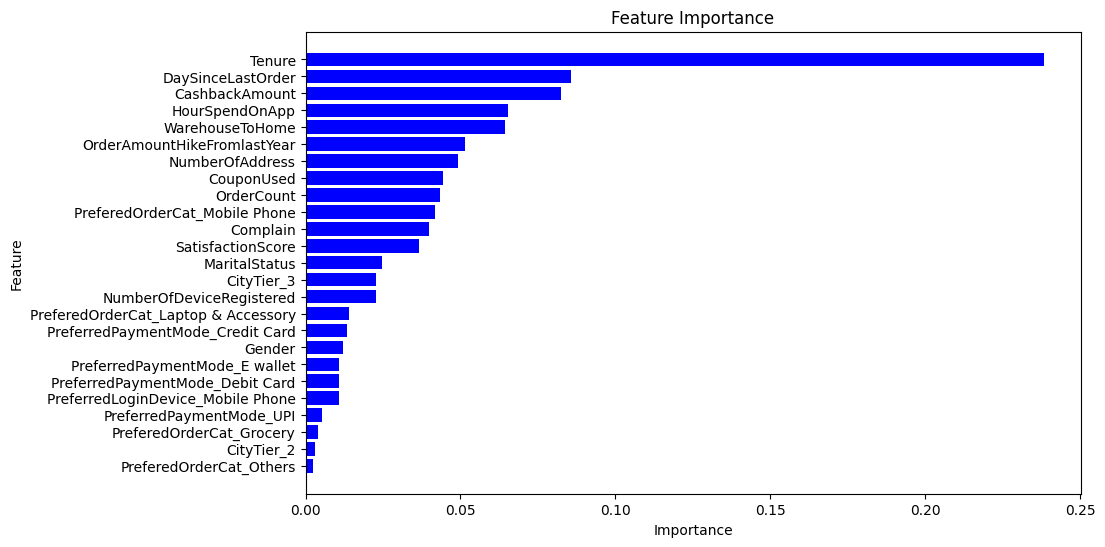

In [53]:
import pandas as pd

# Get feature importance from the model
feature_importances = best_model.feature_importances_

# Create a DataFrame for easier visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
